<a href="https://colab.research.google.com/github/Tahseenasatti/Heart-Disease-Prediction/blob/main/Final_UCI.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# ***Impoert Libraries***

In [ ]:
import pylab as pl
import numpy as np
import pandas as pd
import seaborn as sns
import scipy.optimize as opt
import scipy.stats as stats
import matplotlib.pyplot as plt
from scipy.stats import randint
%matplotlib inline

# Suppress warnings for cleaner output
import warnings
warnings.simplefilter("ignore")

# ***Load Data***

In [ ]:
ha_df = pd.read_csv('/content/heart (1).csv')
ha_df.head()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [ ]:
ha_df.describe()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


# ***Data Understanding***

In [ ]:
# Display the column names in the dataset
ha_df.columns

Index(['age', 'sex', 'cp', 'trtbps', 'chol', 'fbs', 'restecg', 'thalachh',
       'exng', 'oldpeak', 'slp', 'caa', 'thall', 'output'],
      dtype='object')

# ***Univariate Analysis: Histograms for Numerical Features***

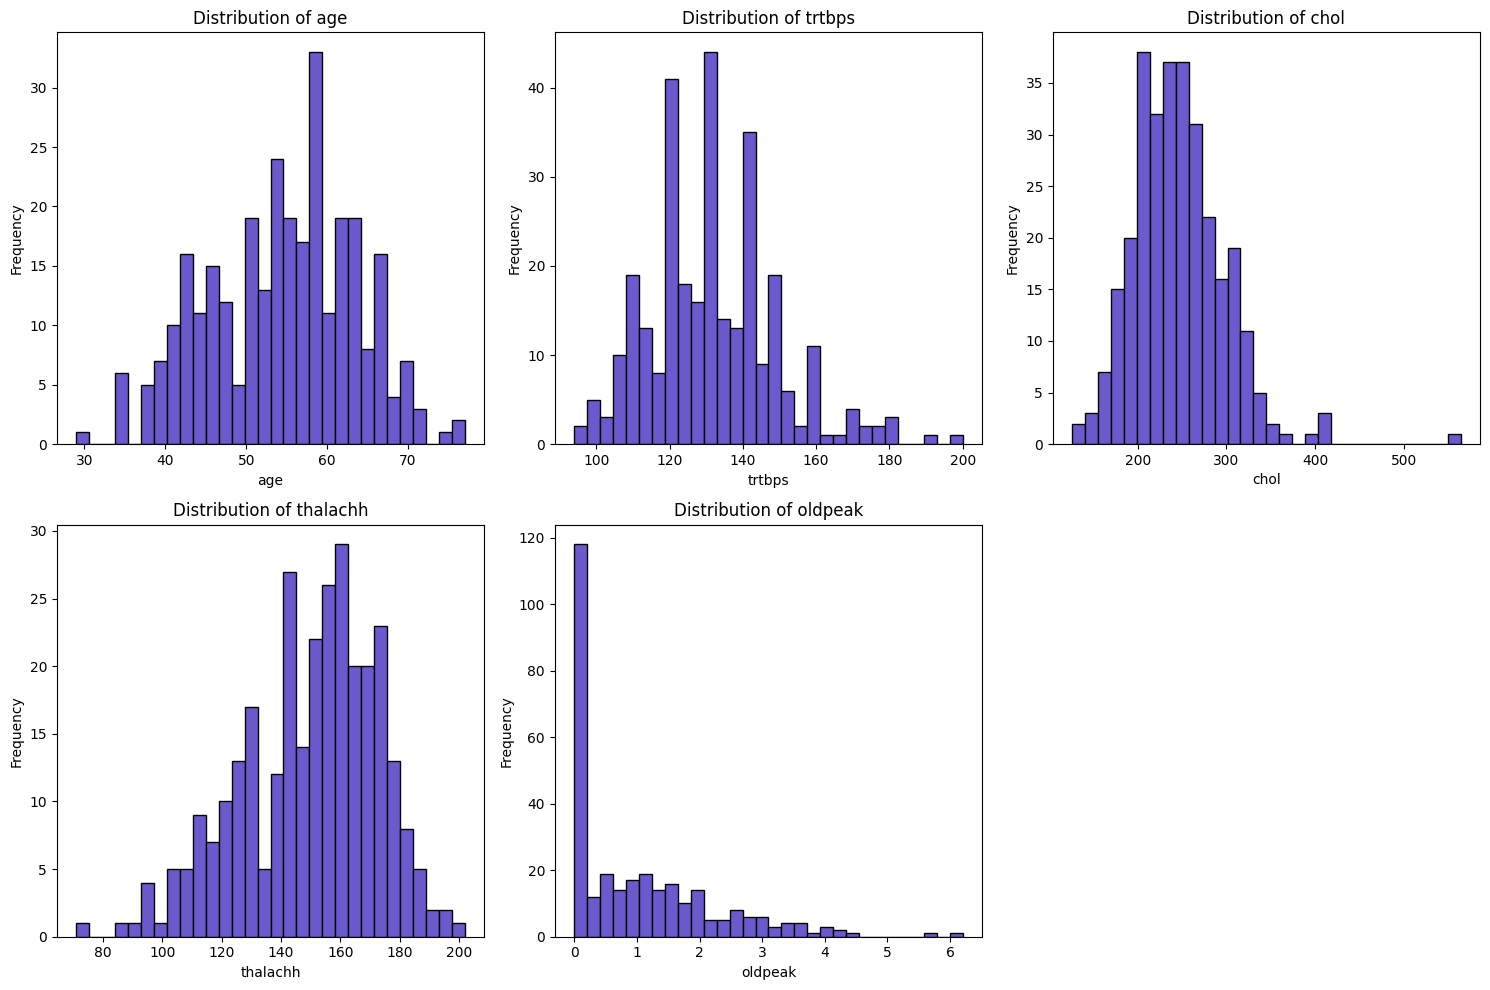

In [ ]:
# Plot histograms for selected numeric columns
# Define the numerical columns for EDA
col_num = ['age', 'trtbps', 'chol', 'thalachh', 'oldpeak']
plt.figure(figsize=(15, 10))
for i, col in enumerate(col_num):
    plt.subplot(2, 3, i + 1)  # Adjust layout for more features
    plt.hist(ha_df[col], bins=30, color='slateblue', edgecolor='black')
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')
plt.tight_layout()
plt.show()


In [ ]:
from PIL import Image

# Open and save as PDF
img = Image.open('features_distribution_uci.png')
img.save('features_distribution_uci.pdf')

FileNotFoundError: [Errno 2] No such file or directory: '/content/features_distribution_uci.png'

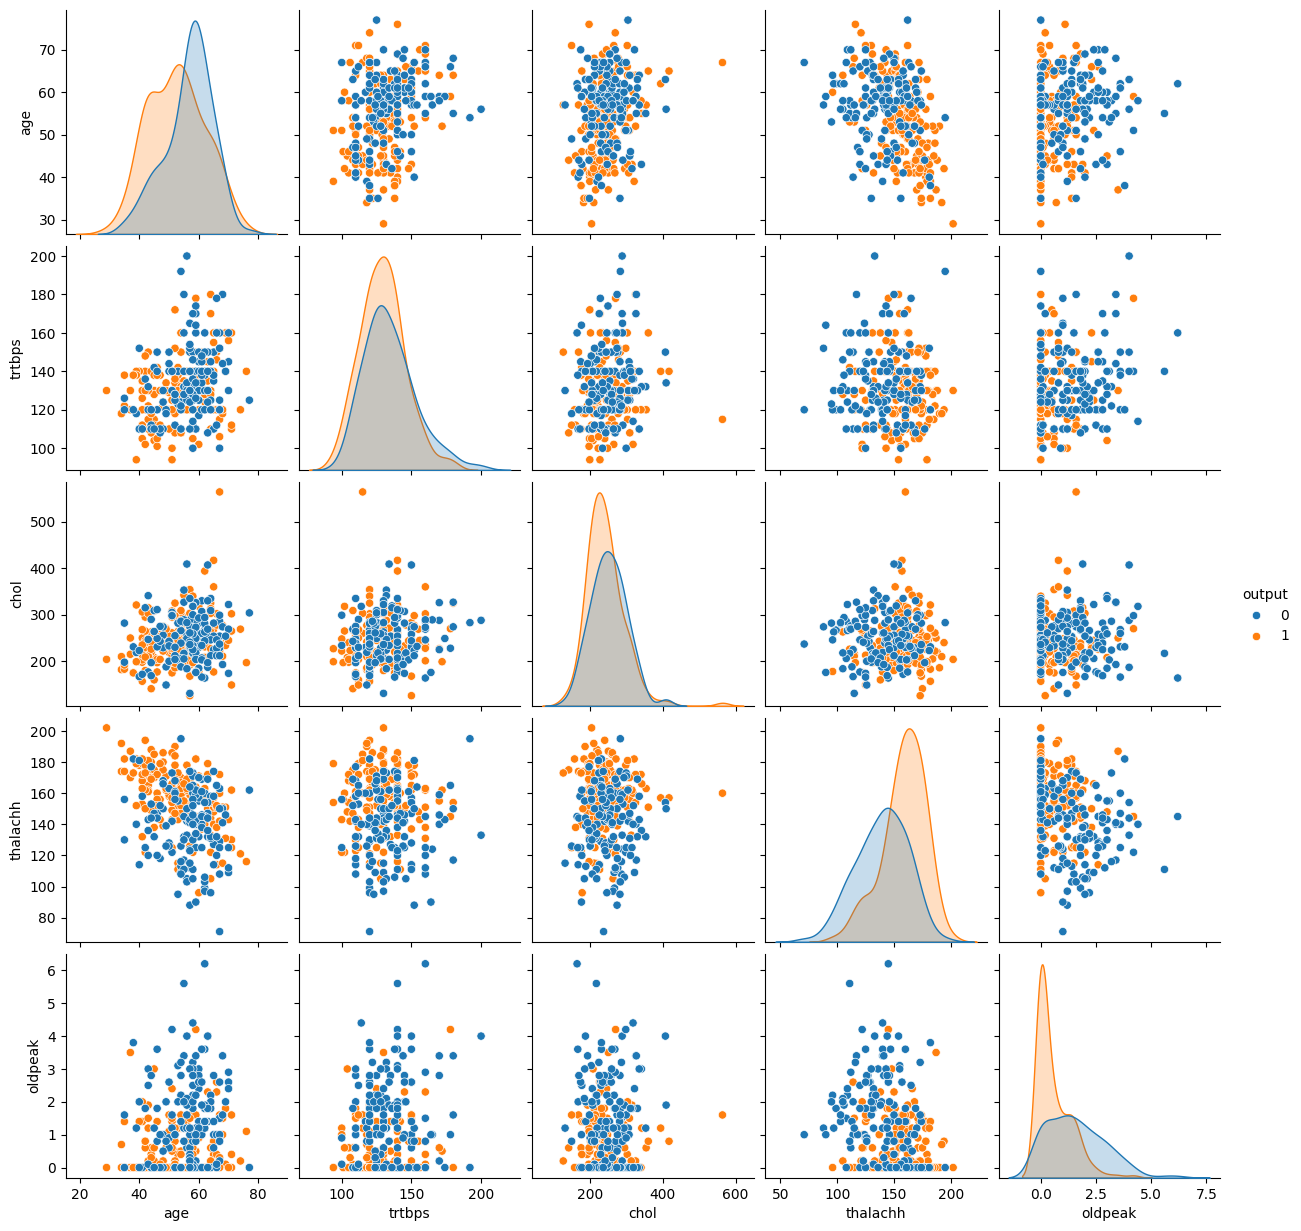

In [ ]:
# Pair plot for numerical features colored by output
sns.pairplot(ha_df, hue='output', vars=col_num)

plt.show()


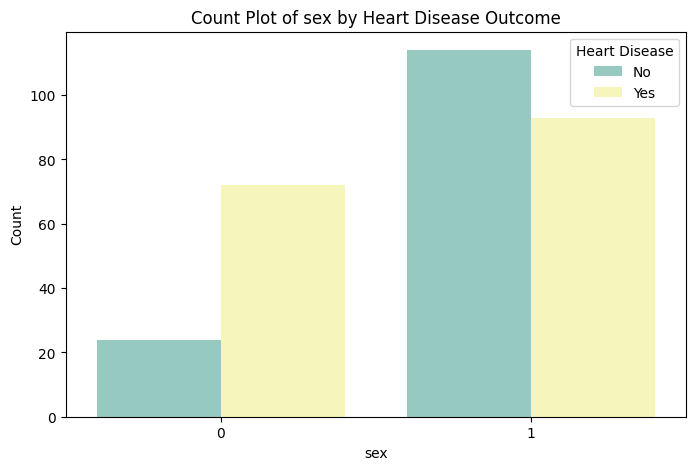

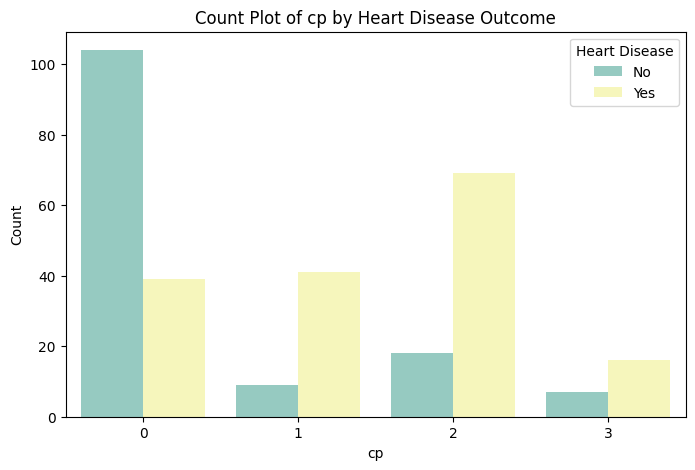

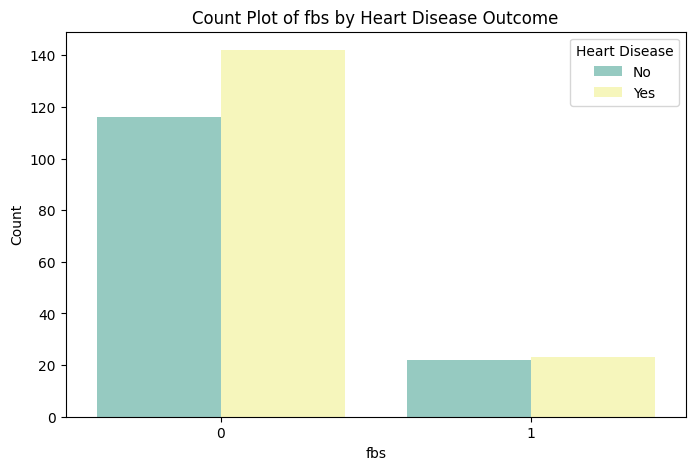

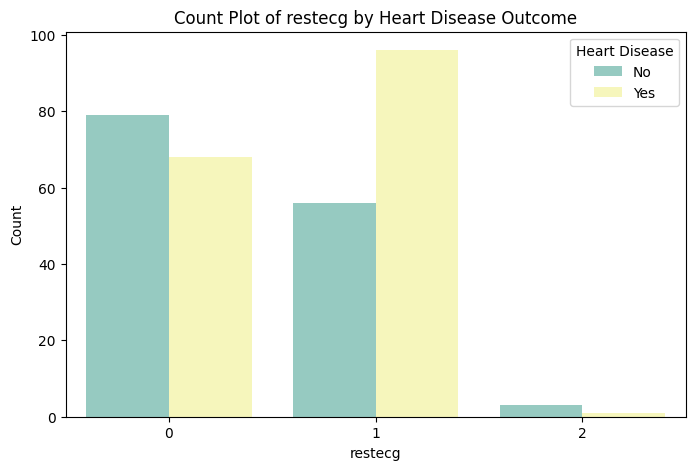

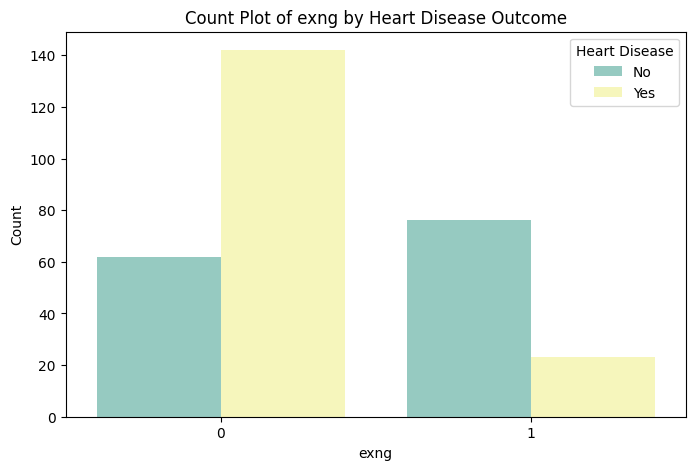

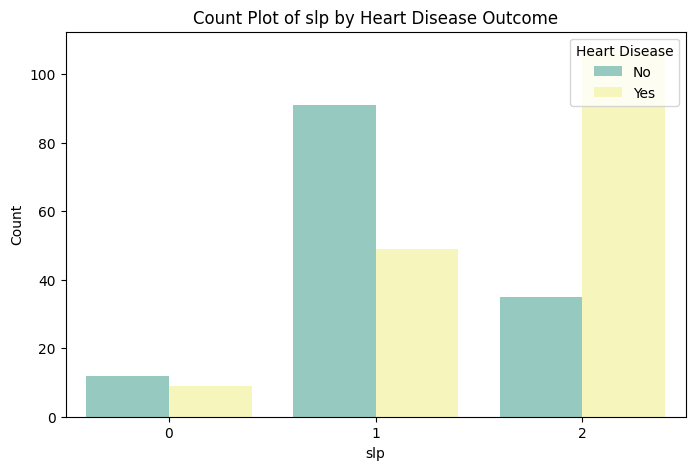

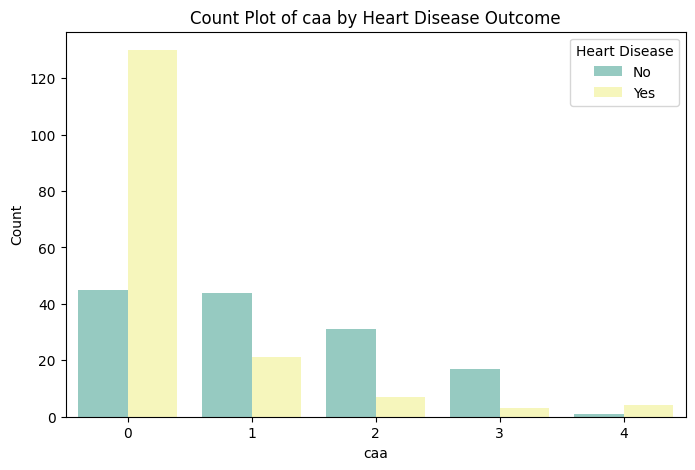

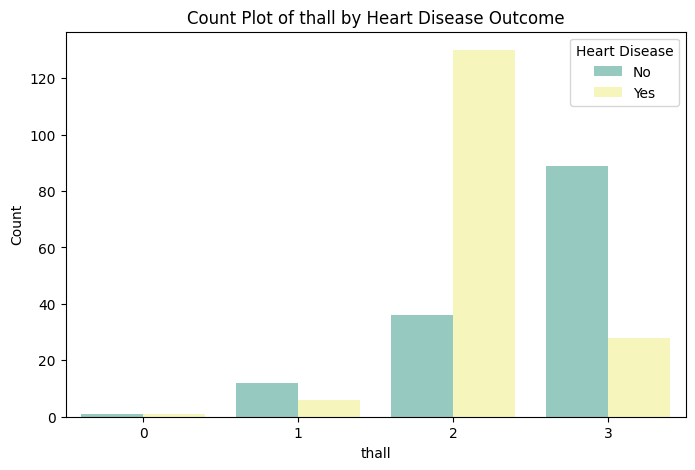

In [ ]:
categoric_cols = ['sex', 'cp', 'fbs', 'restecg',
                  'exng', 'slp', 'caa', 'thall']

for cat in categoric_cols:
    plt.figure(figsize=(8, 5))
    sns.countplot(data=ha_df, x=cat, hue='output', palette='Set3')
    plt.title(f'Count Plot of {cat} by Heart Disease Outcome')
    plt.xlabel(cat)
    plt.ylabel('Count')
    plt.legend(title='Heart Disease', loc='upper right', labels=['No', 'Yes'])
    plt.show()


<Axes: >

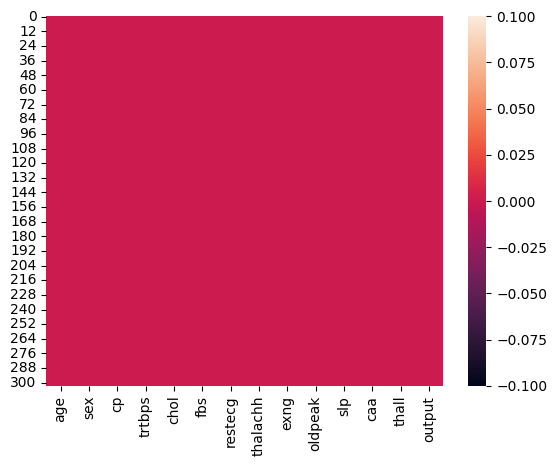

In [ ]:
sns.heatmap(ha_df.isnull())

# ***Heat Map (Correalation)***

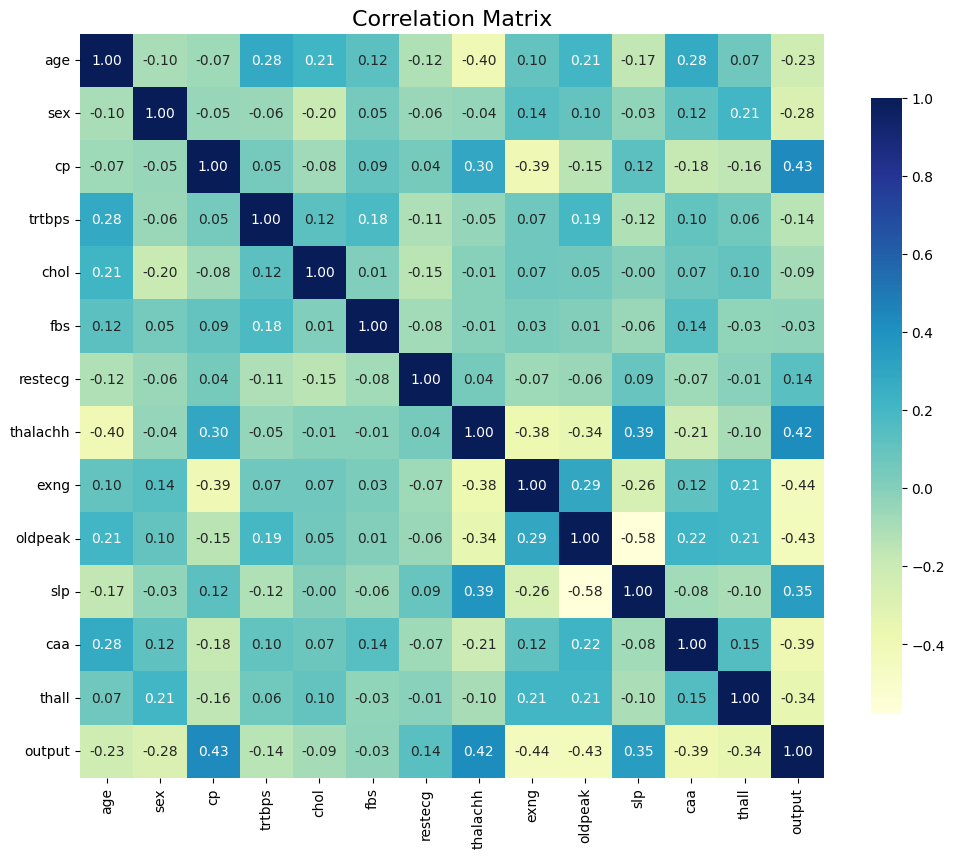

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.colors import LinearSegmentedColormap

# Compute the correlation matrix
correlation_matrix = ha_df.corr()

# Set up the matplotlib figure
plt.figure(figsize=(12, 10))

# Create a custom colormap
cmap = sns.color_palette("YlGnBu", as_cmap=True)

# Draw the heatmap
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap=cmap, square=True, cbar_kws={"shrink": .8})

# Title for the heatmap
plt.title('Correlation Matrix', fontsize=16)

# Show the plot
plt.show()

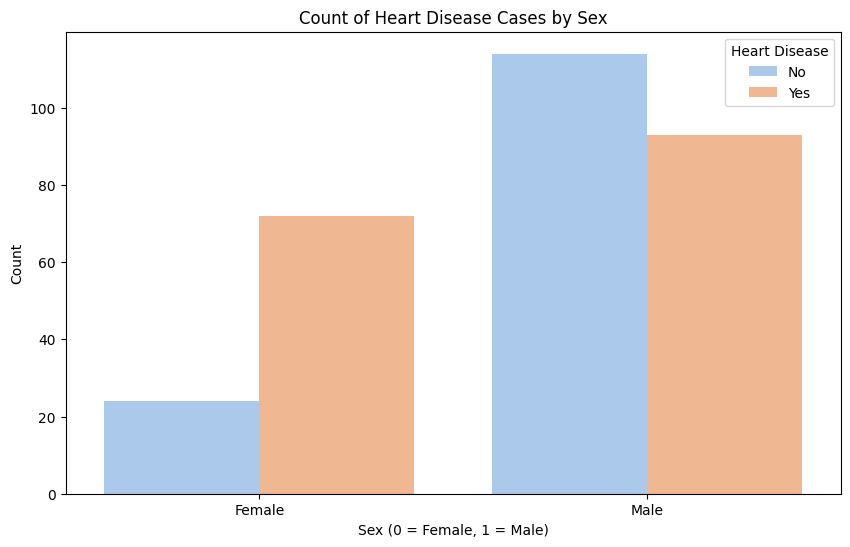

In [ ]:
plt.figure(figsize=(10, 6))
sns.countplot(x='sex', hue='output', data=ha_df, palette='pastel')
plt.title('Count of Heart Disease Cases by Sex')
plt.xlabel('Sex (0 = Female, 1 = Male)')
plt.ylabel('Count')
plt.legend(title='Heart Disease', labels=['No', 'Yes'])
plt.xticks(ticks=[0, 1], labels=['Female', 'Male'])
plt.show()

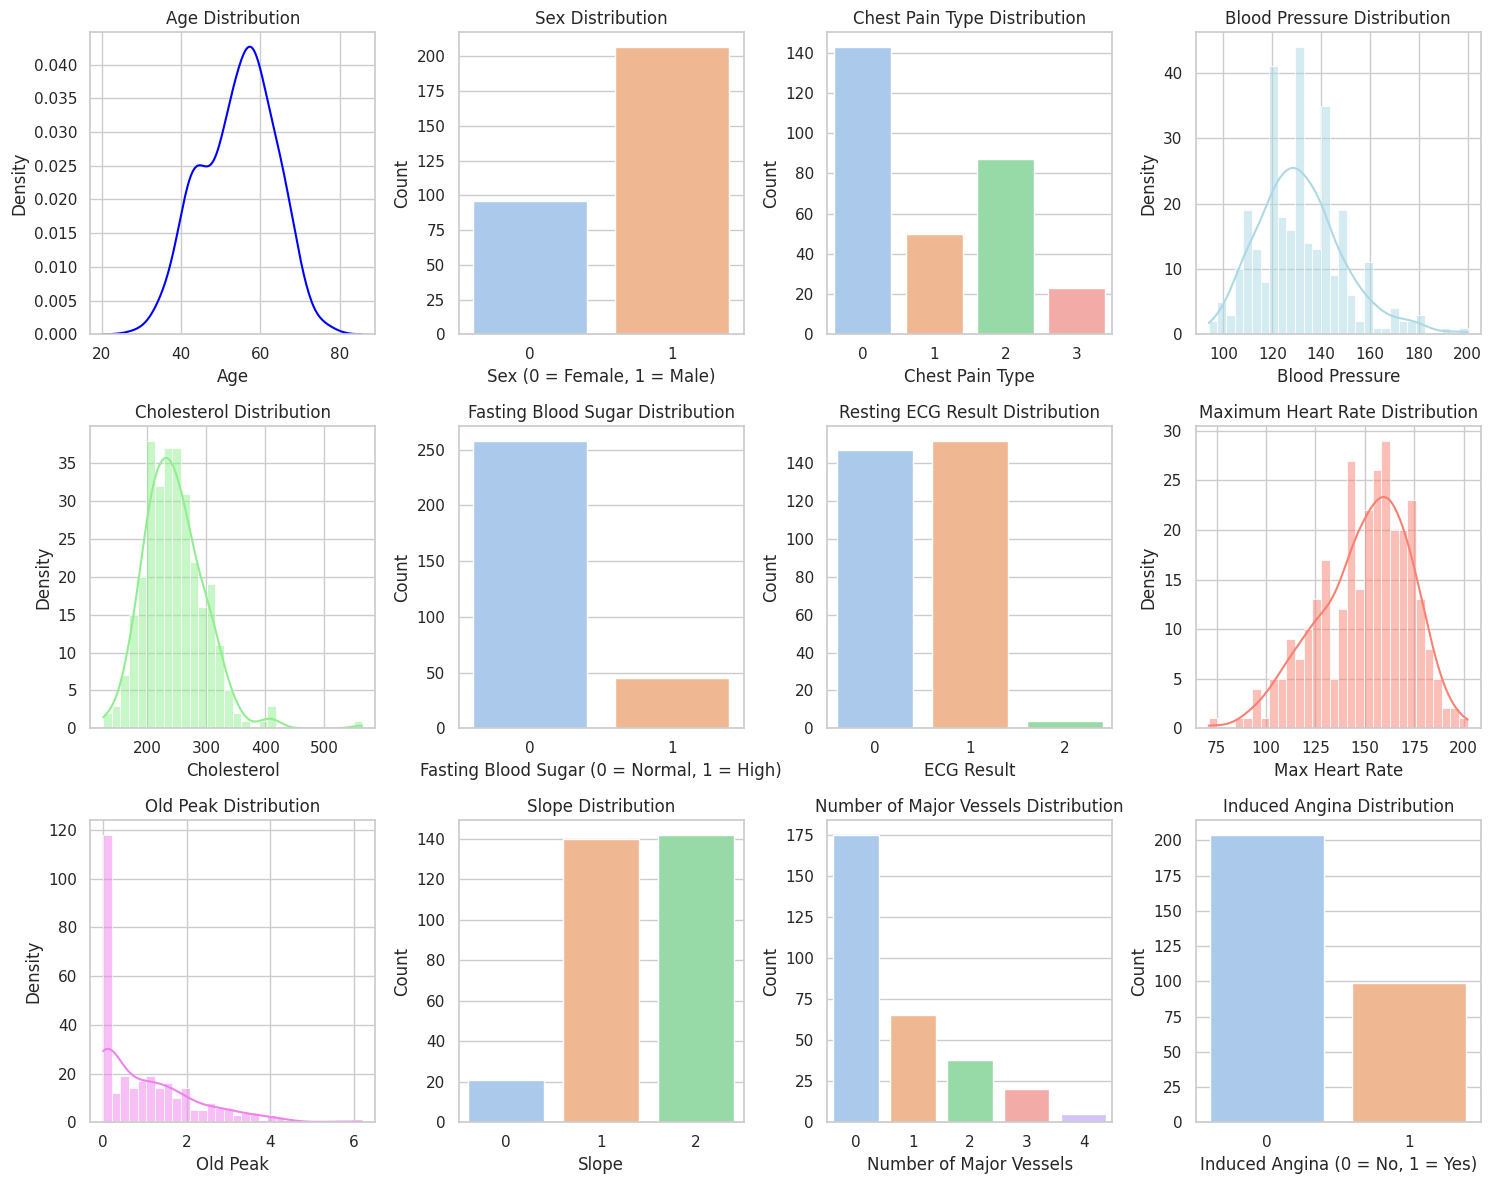

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load the UCI heart disease dataset
ha_df = pd.read_csv('/content/heart (1).csv')

# Set the style of the visualization
sns.set(style="whitegrid")

# Create a 3x4 grid of plots
fig, axs = plt.subplots(3, 4, figsize=(15, 12))

# Plot 1: Age distribution
sns.kdeplot(ha_df['age'], ax=axs[0, 0], color='blue')
axs[0, 0].set_title('Age Distribution')
axs[0, 0].set_xlabel('Age')
axs[0, 0].set_ylabel('Density')

# Plot 2: Sex distribution
sns.countplot(x='sex', data=ha_df, ax=axs[0, 1], palette='pastel')
axs[0, 1].set_title('Sex Distribution')
axs[0, 1].set_xlabel('Sex (0 = Female, 1 = Male)')
axs[0, 1].set_ylabel('Count')

# Plot 3: Chest pain type distribution
sns.countplot(x='cp', data=ha_df, ax=axs[0, 2], palette='pastel')
axs[0, 2].set_title('Chest Pain Type Distribution')
axs[0, 2].set_xlabel('Chest Pain Type')
axs[0, 2].set_ylabel('Count')

# Plot 4: Blood pressure distribution
sns.histplot(ha_df['trtbps'], ax=axs[0, 3], bins=30, kde=True, color='lightblue')
axs[0, 3].set_title('Blood Pressure Distribution')
axs[0, 3].set_xlabel('Blood Pressure')
axs[0, 3].set_ylabel('Density')

# Plot 5: Cholesterol distribution
sns.histplot(ha_df['chol'], ax=axs[1, 0], bins=30, kde=True, color='lightgreen')
axs[1, 0].set_title('Cholesterol Distribution')
axs[1, 0].set_xlabel('Cholesterol')
axs[1, 0].set_ylabel('Density')

# Plot 6: Fasting blood sugar distribution
sns.countplot(x='fbs', data=ha_df, ax=axs[1, 1], palette='pastel')
axs[1, 1].set_title('Fasting Blood Sugar Distribution')
axs[1, 1].set_xlabel('Fasting Blood Sugar (0 = Normal, 1 = High)')
axs[1, 1].set_ylabel('Count')

# Plot 7: Resting electrocardiographic result distribution
sns.countplot(x='restecg', data=ha_df, ax=axs[1, 2], palette='pastel')
axs[1, 2].set_title('Resting ECG Result Distribution')
axs[1, 2].set_xlabel('ECG Result')
axs[1, 2].set_ylabel('Count')

# Plot 8: Maximum heart rate distribution
sns.histplot(ha_df['thalachh'], ax=axs[1, 3], bins=30, kde=True, color='salmon')
axs[1, 3].set_title('Maximum Heart Rate Distribution')
axs[1, 3].set_xlabel('Max Heart Rate')
axs[1, 3].set_ylabel('Density')

# Plot 9: Old peak distribution
sns.histplot(ha_df['oldpeak'], ax=axs[2, 0], bins=30, kde=True, color='violet')
axs[2, 0].set_title('Old Peak Distribution')
axs[2, 0].set_xlabel('Old Peak')
axs[2, 0].set_ylabel('Density')

# Plot 10: Slope distribution
sns.countplot(x='slp', data=ha_df, ax=axs[2, 1], palette='pastel')
axs[2, 1].set_title('Slope Distribution')
axs[2, 1].set_xlabel('Slope')
axs[2, 1].set_ylabel('Count')

# Plot 11: Number of major vessels distribution
sns.countplot(x='caa', data=ha_df, ax=axs[2, 2], palette='pastel')
axs[2, 2].set_title('Number of Major Vessels Distribution')
axs[2, 2].set_xlabel('Number of Major Vessels')
axs[2, 2].set_ylabel('Count')

# Plot 12: Induced angina distribution
sns.countplot(x='exng', data=ha_df, ax=axs[2, 3], palette='pastel')
axs[2, 3].set_title('Induced Angina Distribution')
axs[2, 3].set_xlabel('Induced Angina (0 = No, 1 = Yes)')
axs[2, 3].set_ylabel('Count')

# Adjust layout
plt.tight_layout()
plt.show()


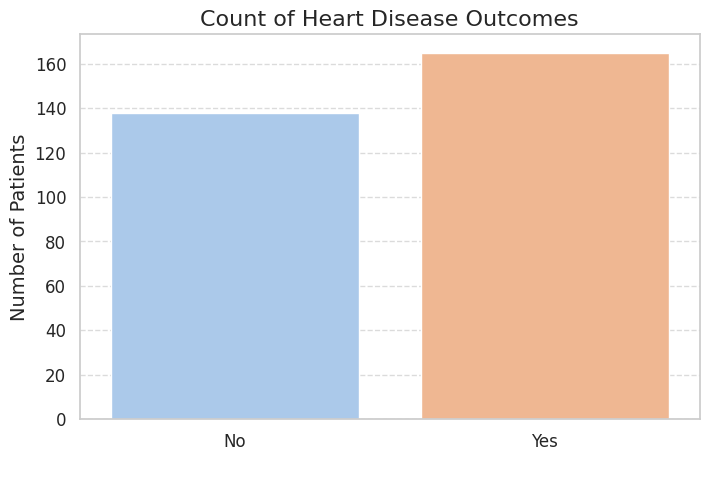

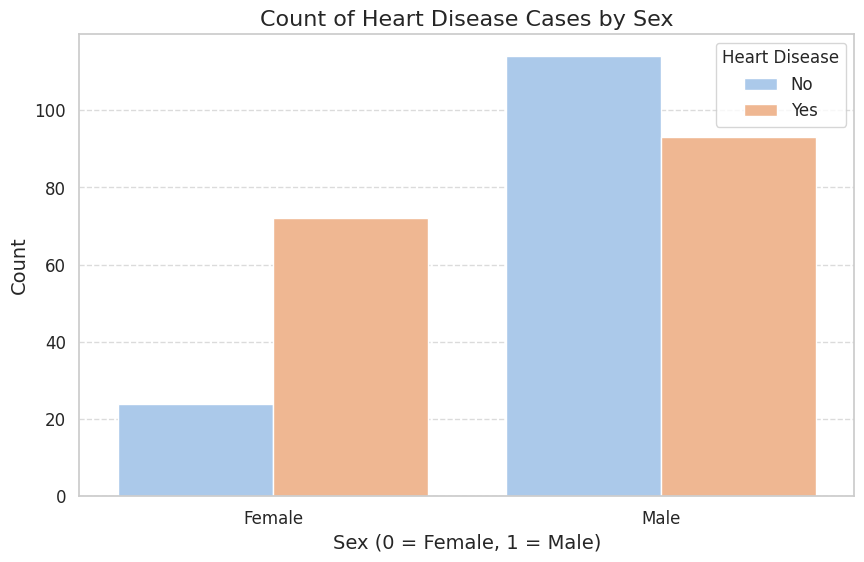

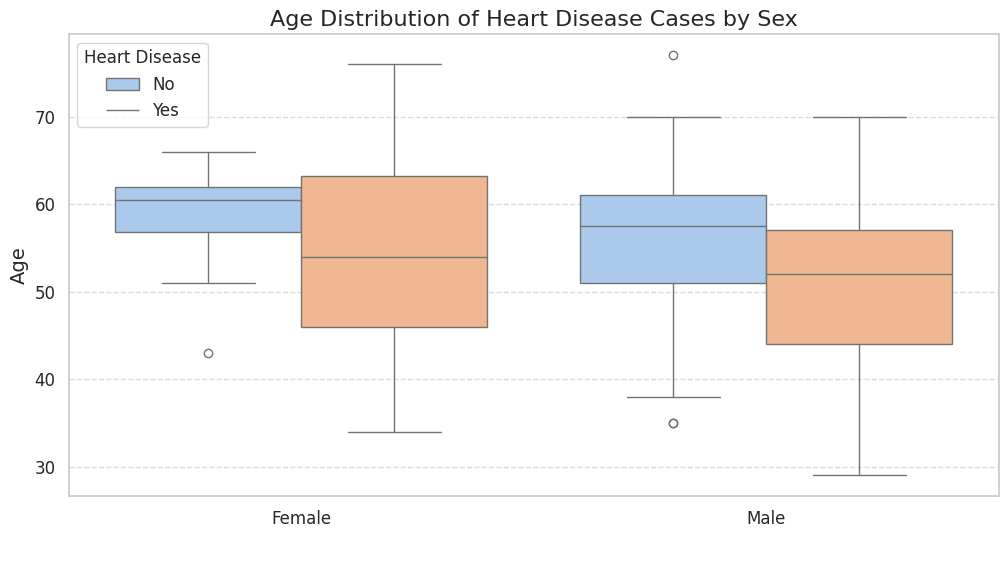

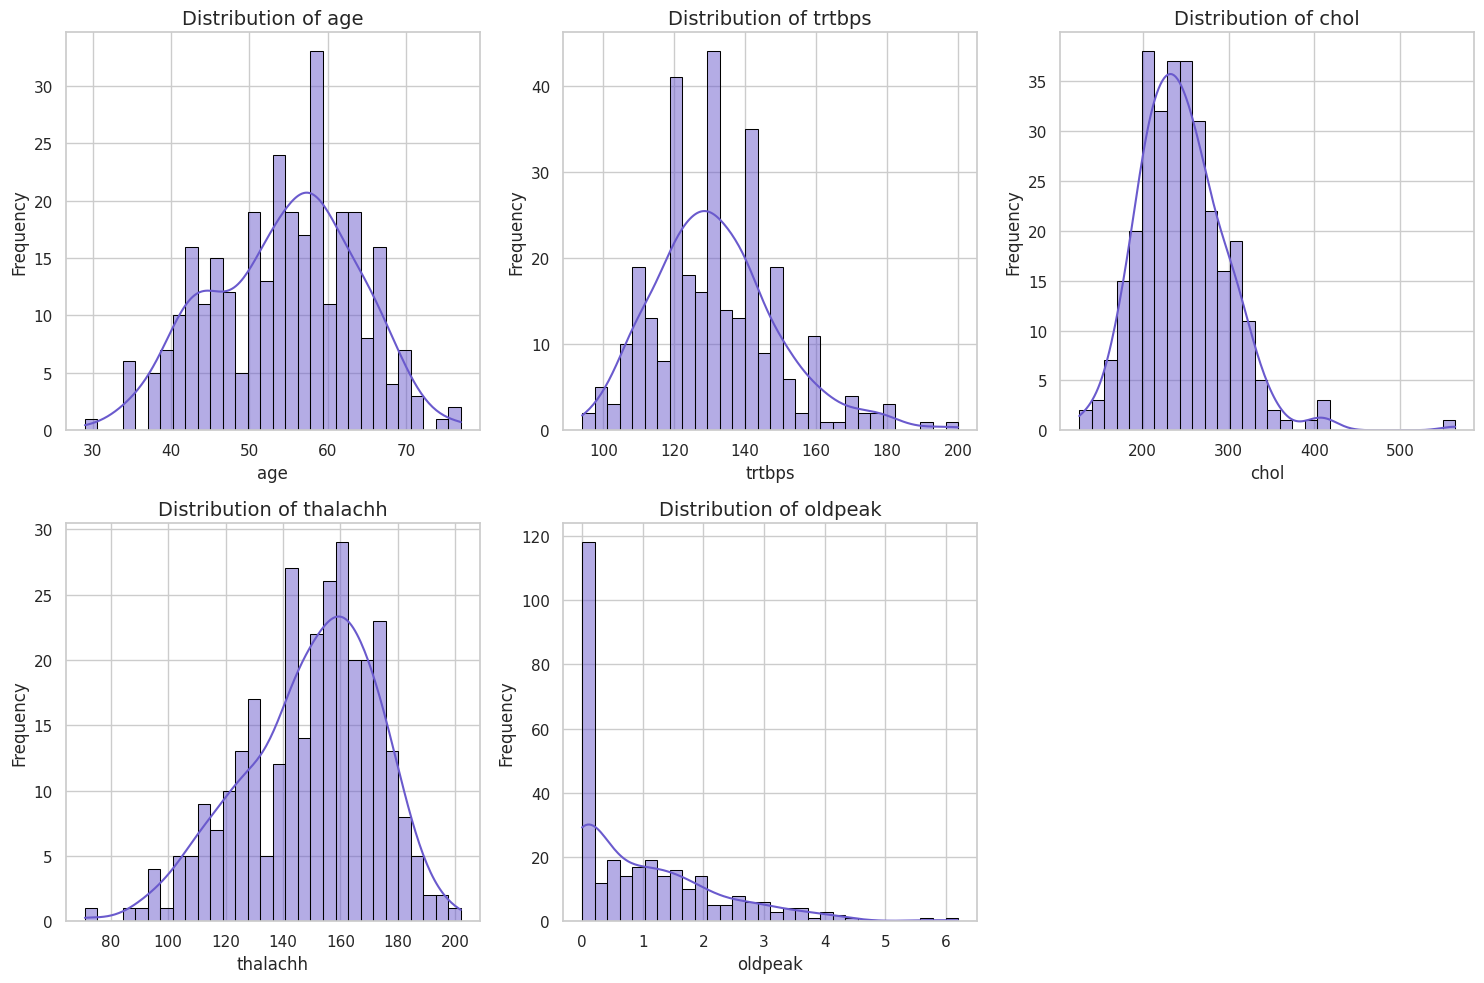

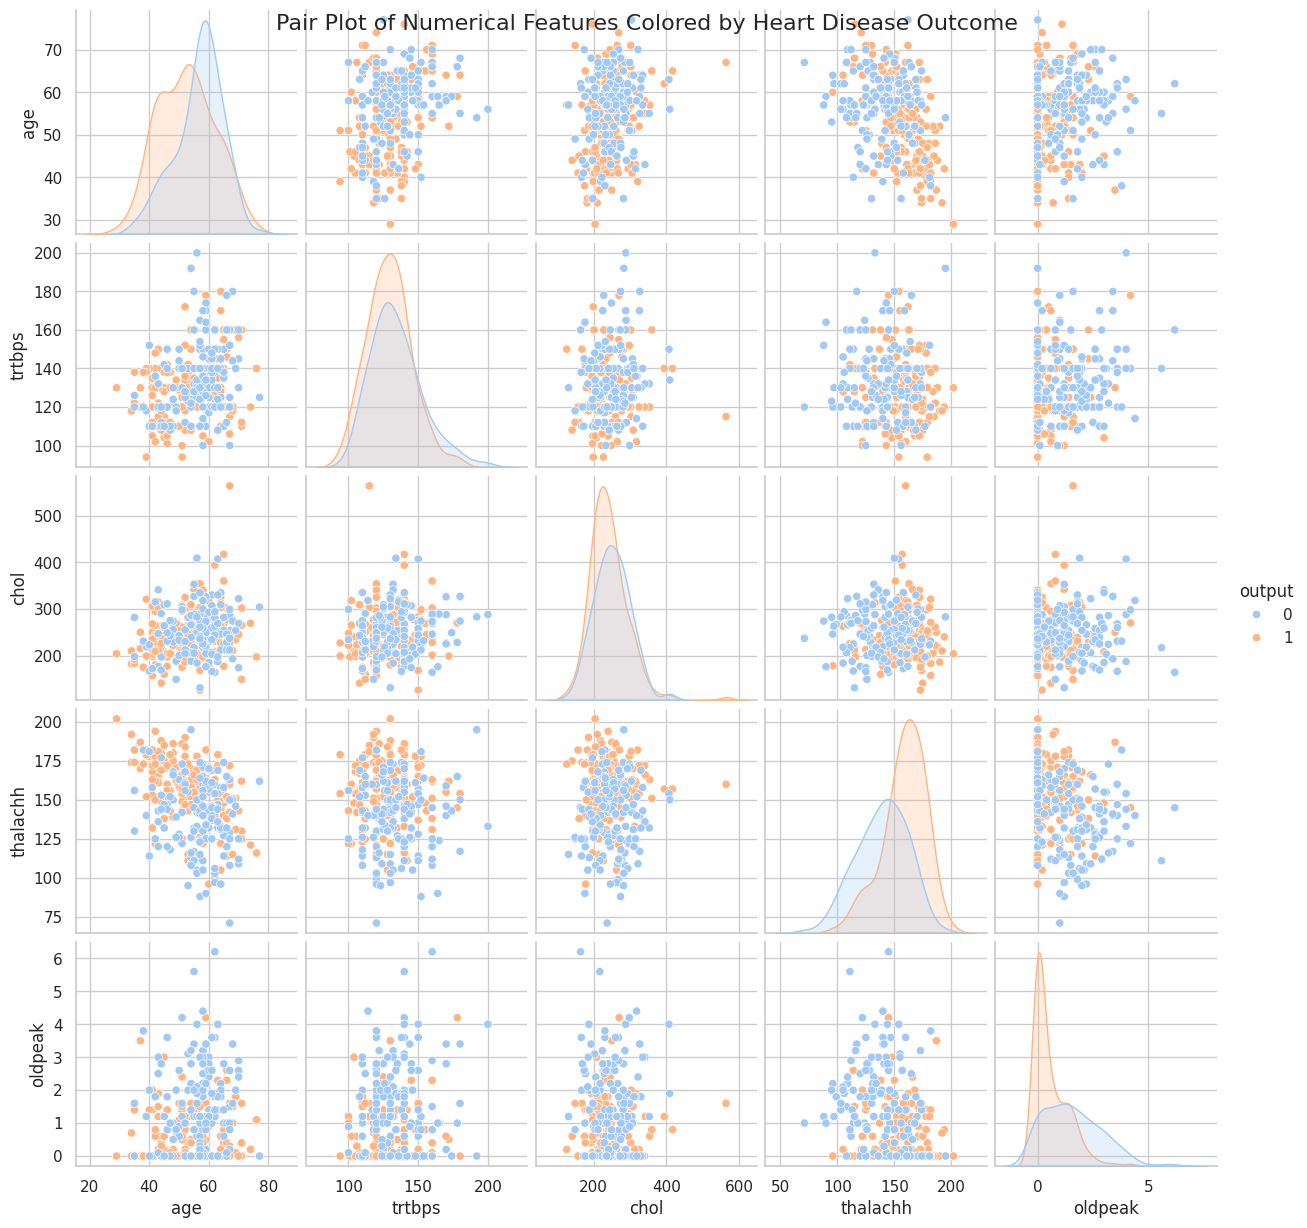

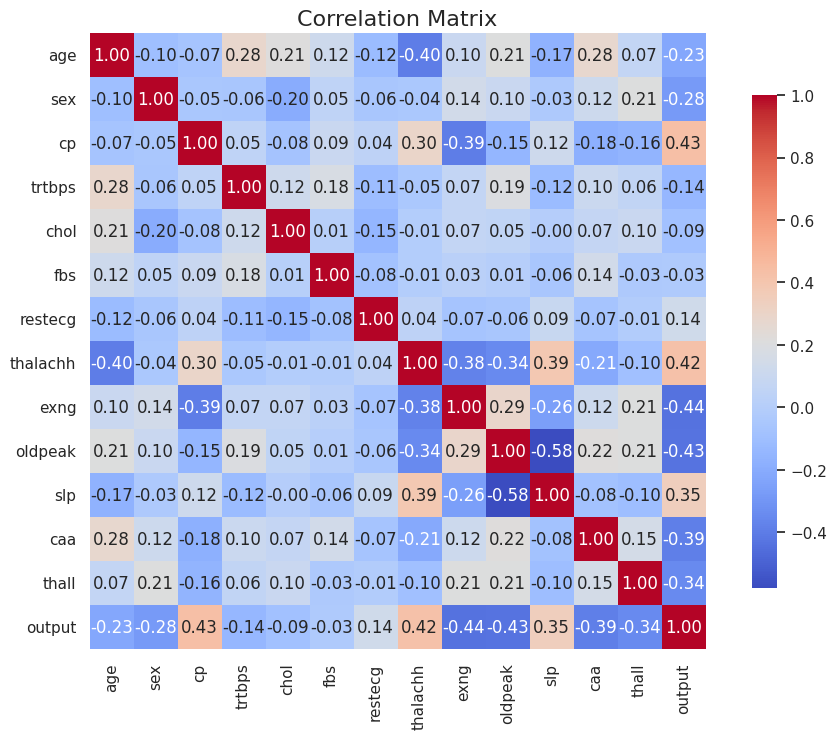

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load the UCI heart disease dataset
ha_df = pd.read_csv('/content/heart (1).csv')

# Set the style of the visualization
sns.set(style="whitegrid")

# Define a function to improve plot aesthetics
def set_plot_style(title):
    plt.title(title, fontsize=16)
    plt.xlabel(' ', fontsize=14)
    plt.ylabel('Count', fontsize=14)
    plt.xticks(fontsize=12)
    plt.yticks(fontsize=12)
    plt.grid(axis='y', linestyle='--', alpha=0.7)

# 1. Count Plot for Heart Disease Outcomes
plt.figure(figsize=(8, 5))
sns.countplot(x='output', data=ha_df, palette='pastel')
set_plot_style('Count of Heart Disease Outcomes')
plt.xticks(ticks=[0, 1], labels=['No', 'Yes'])
plt.ylabel('Number of Patients', fontsize=14)
plt.show()

# 2. Count Plot for Heart Disease by Sex
plt.figure(figsize=(10, 6))
sns.countplot(x='sex', hue='output', data=ha_df, palette='pastel')
set_plot_style('Count of Heart Disease Cases by Sex')
plt.xlabel('Sex (0 = Female, 1 = Male)', fontsize=14)
plt.legend(title='Heart Disease', labels=['No', 'Yes'], fontsize=12)
plt.xticks(ticks=[0, 1], labels=['Female', 'Male'], fontsize=12)
plt.show()

# 3. Box Plot for Age Distribution by Heart Disease Outcome and Sex
plt.figure(figsize=(12, 6))
sns.boxplot(x='sex', y='age', hue='output', data=ha_df, palette='pastel')
set_plot_style('Age Distribution of Heart Disease Cases by Sex')
plt.ylabel('Age', fontsize=14)
plt.legend(title='Heart Disease', labels=['No', 'Yes'], fontsize=12)
plt.xticks(ticks=[0, 1], labels=['Female', 'Male'], fontsize=12)
plt.show()

# 4. Histograms for Selected Numeric Columns
num_cols = ['age', 'trtbps', 'chol', 'thalachh', 'oldpeak']
plt.figure(figsize=(15, 10))
for i, col in enumerate(num_cols):
    plt.subplot(2, 3, i + 1)
    sns.histplot(ha_df[col], bins=30, kde=True, color='slateblue', edgecolor='black')
    plt.title(f'Distribution of {col}', fontsize=14)
    plt.xlabel(col, fontsize=12)
    plt.ylabel('Frequency', fontsize=12)
plt.tight_layout()
plt.show()

# 5. Pair Plot for Selected Features
sns.pairplot(ha_df, hue='output', vars=num_cols, palette='pastel')
plt.suptitle("Pair Plot of Numerical Features Colored by Heart Disease Outcome", fontsize=16)
plt.show()

# 6. Heatmap for Correlation Matrix
plt.figure(figsize=(12, 8))
correlation_matrix = ha_df.corr()
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm', square=True, cbar_kws={"shrink": .8})
plt.title('Correlation Matrix', fontsize=16)
plt.show()





In [ ]:
# Count of heart disease patients
heart_disease_patients = ha_df[ha_df['output'] == 1]  # Assuming 'output' is the target variable indicating heart disease

# Count of males and females diagnosed with heart disease
males_with_heart_disease = heart_disease_patients[heart_disease_patients['sex'] == 1].shape[0]  # Assuming 1 represents Male
females_with_heart_disease = heart_disease_patients[heart_disease_patients['sex'] == 0].shape[0]  # Assuming 0 represents Female

print(f"Number of males diagnosed with heart disease: {males_with_heart_disease}")
print(f"Number of females diagnosed with heart disease: {females_with_heart_disease}")


Number of males diagnosed with heart disease: 93
Number of females diagnosed with heart disease: 72


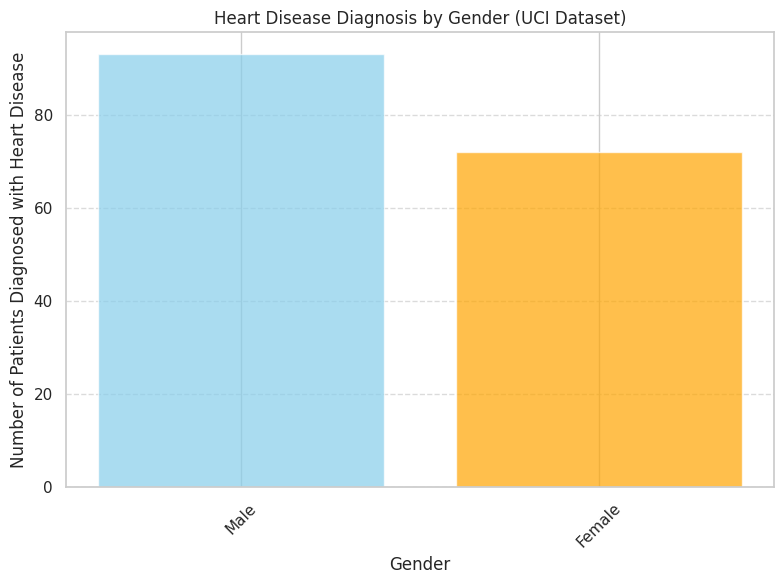

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the UCI heart disease dataset
ha_df = pd.read_csv('/content/heart (1).csv')

# Count of heart disease patients
heart_disease_patients = ha_df[ha_df['output'] == 1]  # Assuming 'output' is the target variable indicating heart disease

# Count of males and females diagnosed with heart disease
males_with_heart_disease = heart_disease_patients[heart_disease_patients['sex'] == 1].shape[0]  # Assuming 1 represents Male
females_with_heart_disease = heart_disease_patients[heart_disease_patients['sex'] == 0].shape[0]  # Assuming 0 represents Female

# Data for the graph
data = {
    'Gender': ['Male', 'Female'],
    'Count': [males_with_heart_disease, females_with_heart_disease]
}

# Create a DataFrame
df = pd.DataFrame(data)

# Plotting
plt.figure(figsize=(8, 6))
plt.bar(df['Gender'], df['Count'], color=['skyblue', 'orange'], alpha=0.7)
plt.title('Heart Disease Diagnosis by Gender (UCI Dataset)')
plt.xlabel('Gender')
plt.ylabel('Number of Patients Diagnosed with Heart Disease')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Show the plot
plt.tight_layout()
plt.show()


# ***Class Distribution***

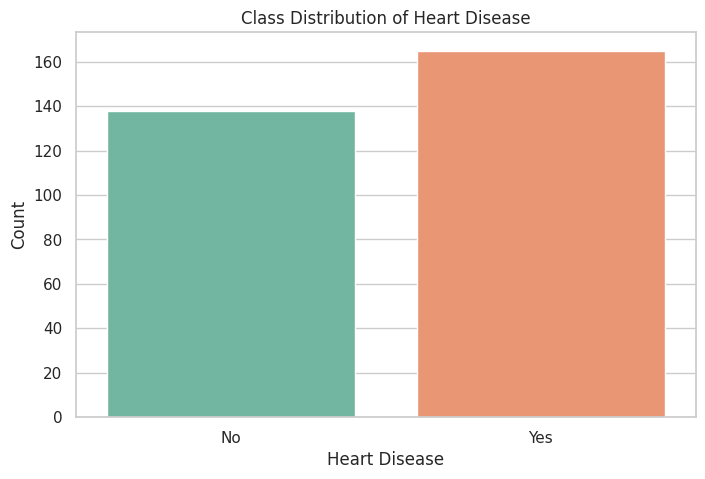

In [ ]:
plt.figure(figsize=(8, 5))
sns.countplot(x='output', data=ha_df, palette='Set2')
plt.title('Class Distribution of Heart Disease')
plt.xlabel('Heart Disease')
plt.ylabel('Count')
plt.xticks([0, 1], ['No', 'Yes'])
plt.show()


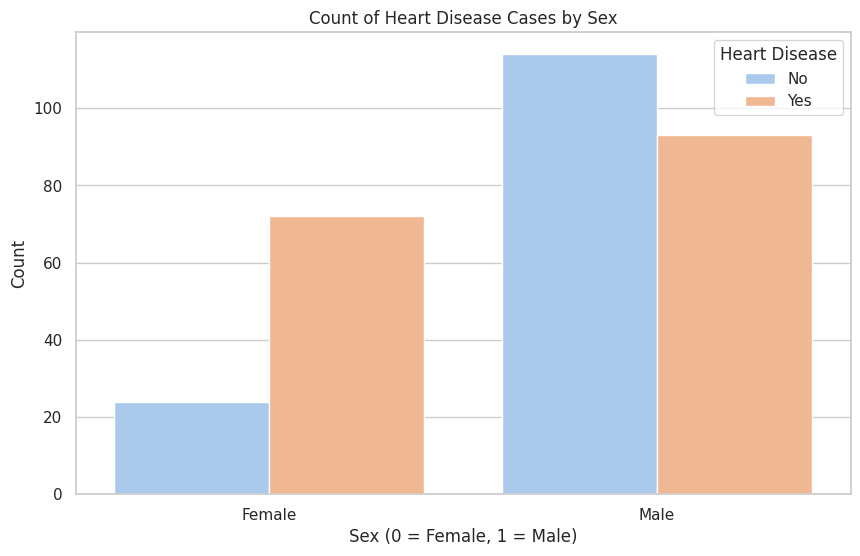

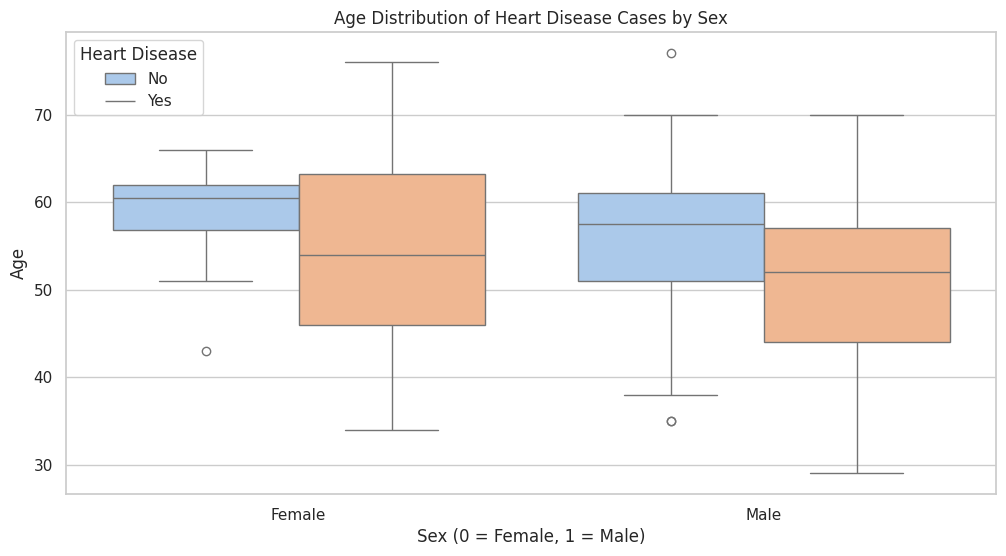

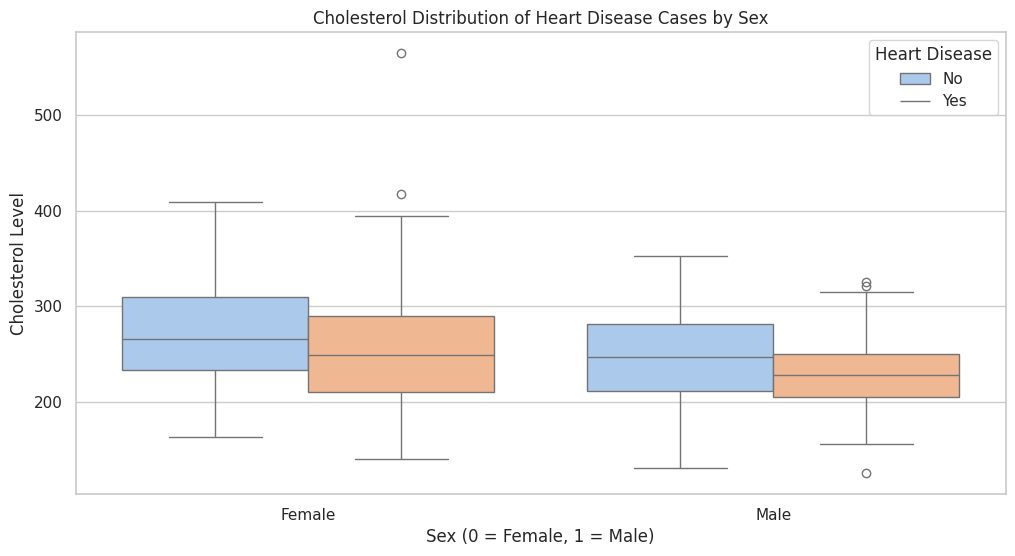

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assume ha_df is your DataFrame with heart disease data

# Set the style of the visualization
sns.set(style="whitegrid")

# Count plot for heart disease by sex
plt.figure(figsize=(10, 6))
sns.countplot(x='sex', hue='output', data=ha_df, palette='pastel')
plt.title('Count of Heart Disease Cases by Sex')
plt.xlabel('Sex (0 = Female, 1 = Male)')
plt.ylabel('Count')
plt.legend(title='Heart Disease', labels=['No', 'Yes'])
plt.xticks(ticks=[0, 1], labels=['Female', 'Male'])
plt.show()

# Box plot for age distribution by heart disease outcome and sex
plt.figure(figsize=(12, 6))
sns.boxplot(x='sex', y='age', hue='output', data=ha_df, palette='pastel')
plt.title('Age Distribution of Heart Disease Cases by Sex')
plt.xlabel('Sex (0 = Female, 1 = Male)')
plt.ylabel('Age')
plt.legend(title='Heart Disease', labels=['No', 'Yes'])
plt.xticks(ticks=[0, 1], labels=['Female', 'Male'])
plt.show()

# Optionally, create similar plots for other numerical features
# For example, Cholesterol distribution by sex and heart disease outcome
plt.figure(figsize=(12, 6))
sns.boxplot(x='sex', y='chol', hue='output', data=ha_df, palette='pastel')
plt.title('Cholesterol Distribution of Heart Disease Cases by Sex')
plt.xlabel('Sex (0 = Female, 1 = Male)')
plt.ylabel('Cholesterol Level')
plt.legend(title='Heart Disease', labels=['No', 'Yes'])
plt.xticks(ticks=[0, 1], labels=['Female', 'Male'])
plt.show()


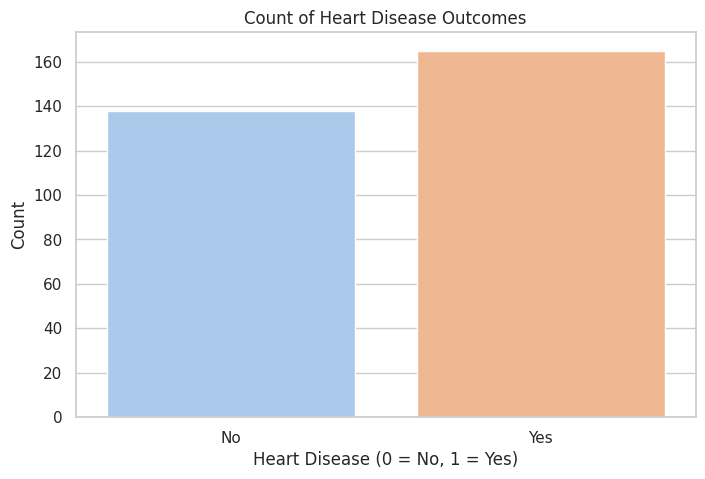

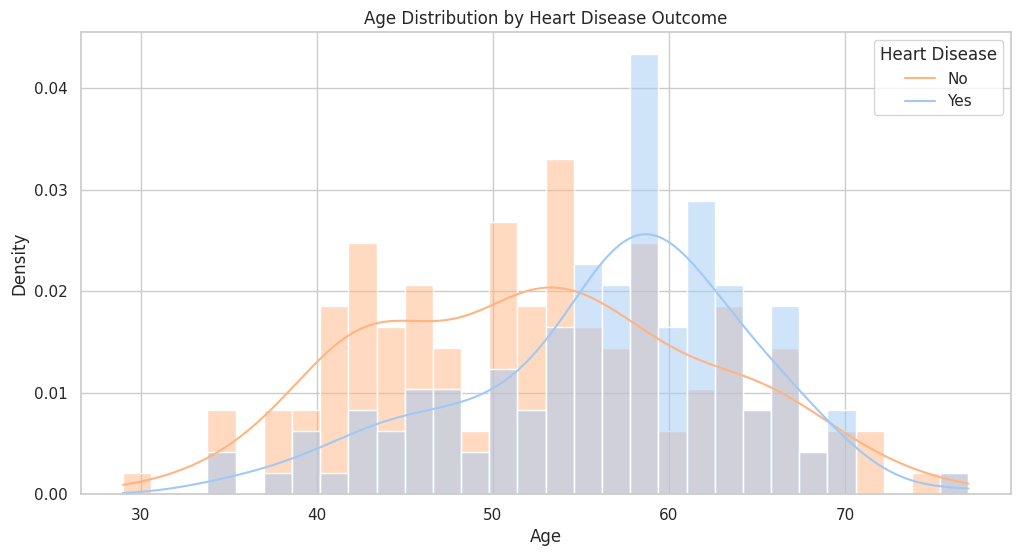

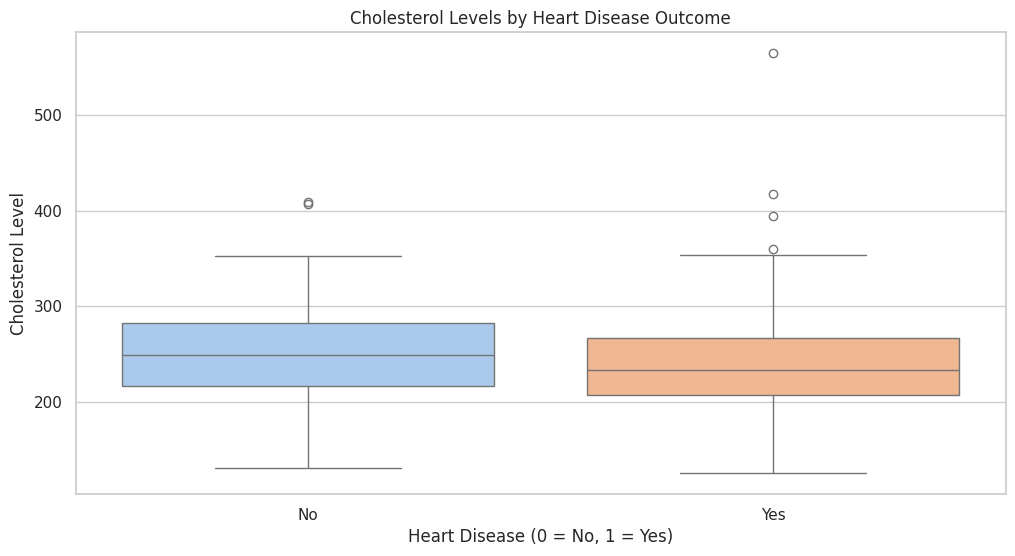

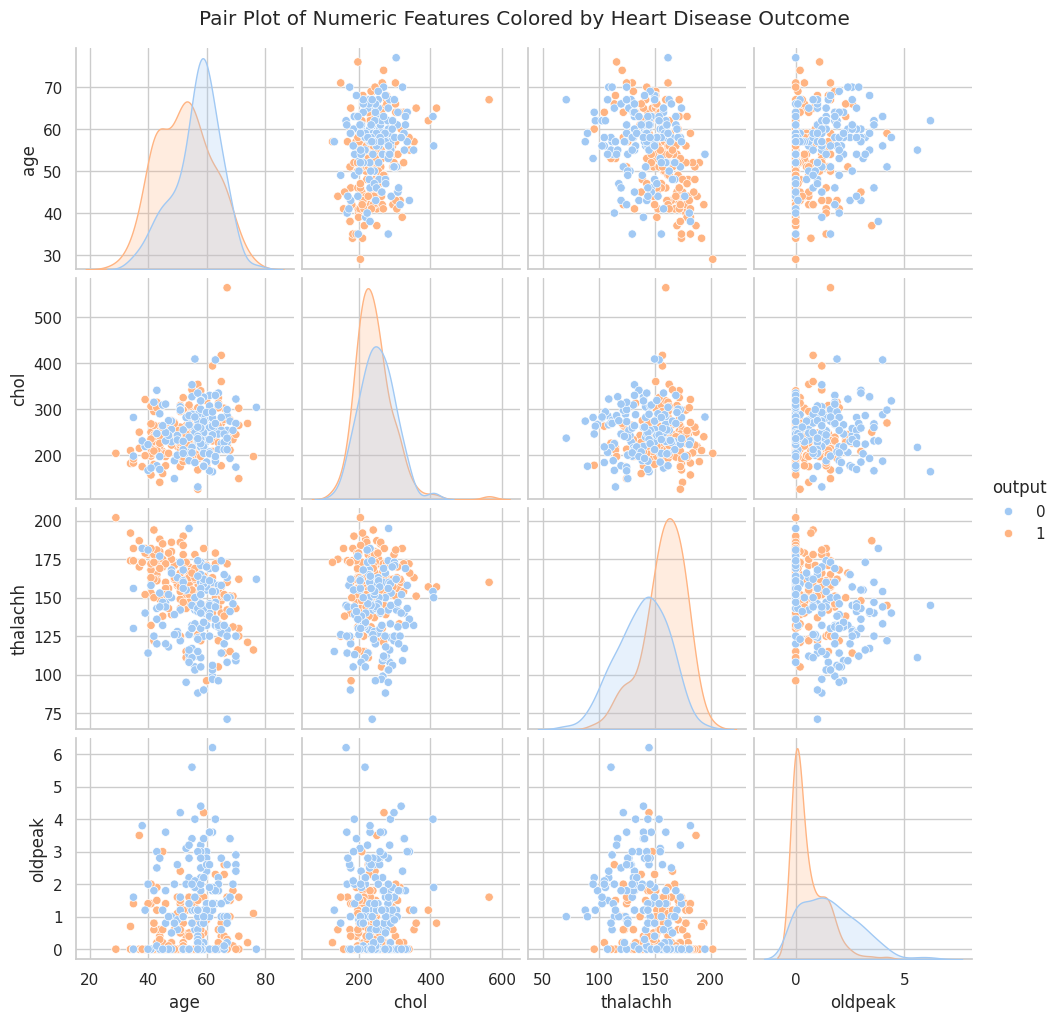

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming ha_df is your DataFrame with heart disease data

# Set the style for the plots
sns.set(style="whitegrid")

# 1. Count Plot for Heart Disease Outcomes
plt.figure(figsize=(8, 5))
sns.countplot(x='output', data=ha_df, palette='pastel')
plt.title('Count of Heart Disease Outcomes')
plt.xlabel('Heart Disease (0 = No, 1 = Yes)')
plt.ylabel('Count')
plt.xticks(ticks=[0, 1], labels=['No', 'Yes'])
plt.show()

# 2. Distribution of Age with respect to Heart Disease
plt.figure(figsize=(12, 6))
sns.histplot(data=ha_df, x='age', hue='output', bins=30, kde=True, palette='pastel', stat='density')
plt.title('Age Distribution by Heart Disease Outcome')
plt.xlabel('Age')
plt.ylabel('Density')
plt.legend(title='Heart Disease', labels=['No', 'Yes'])
plt.show()

# 3. Box Plot for Cholesterol Levels by Heart Disease Outcome
plt.figure(figsize=(12, 6))
sns.boxplot(x='output', y='chol', data=ha_df, palette='pastel')
plt.title('Cholesterol Levels by Heart Disease Outcome')
plt.xlabel('Heart Disease (0 = No, 1 = Yes)')
plt.ylabel('Cholesterol Level')
plt.xticks(ticks=[0, 1], labels=['No', 'Yes'])
plt.show()

# 4. Pair Plot for Selected Numeric Features
selected_features = ['age', 'chol', 'thalachh', 'oldpeak', 'output']
sns.pairplot(ha_df[selected_features], hue='output', palette='pastel')
plt.suptitle('Pair Plot of Numeric Features Colored by Heart Disease Outcome', y=1.02)
plt.show()


# ***Data Preprocessing***

In [ ]:
# Check data information, data types, and missing values
ha_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trtbps    303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalachh  303 non-null    int64  
 8   exng      303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slp       303 non-null    int64  
 11  caa       303 non-null    int64  
 12  thall     303 non-null    int64  
 13  output    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [ ]:
categoric_cols = ['sex', 'cp', 'fbs', 'restecg',
                  'exng', 'slp', 'caa', 'thall']

In [ ]:
# Check all unique values in categorical columns

for i in categoric_cols:
    if i in ha_df.columns:
        print('All values in column {0} : \n{1}'.format(i, ha_df[i].value_counts().sort_index()))
        print('\n')
    else:
        print(f'Column {i} not found in the DataFrame.')

# Print the list of categorical columns
print('Categorical columns:', categoric_cols)

All values in column sex : 
sex
0     96
1    207
Name: count, dtype: int64


All values in column cp : 
cp
0    143
1     50
2     87
3     23
Name: count, dtype: int64


All values in column fbs : 
fbs
0    258
1     45
Name: count, dtype: int64


All values in column restecg : 
restecg
0    147
1    152
2      4
Name: count, dtype: int64


All values in column exng : 
exng
0    204
1     99
Name: count, dtype: int64


All values in column slp : 
slp
0     21
1    140
2    142
Name: count, dtype: int64


All values in column caa : 
caa
0    175
1     65
2     38
3     20
4      5
Name: count, dtype: int64


All values in column thall : 
thall
0      2
1     18
2    166
3    117
Name: count, dtype: int64


Categorical columns: ['sex', 'cp', 'fbs', 'restecg', 'exng', 'slp', 'caa', 'thall']


# Outliers using boxplots and remove data points outside 1.5*IQR ***bold text***

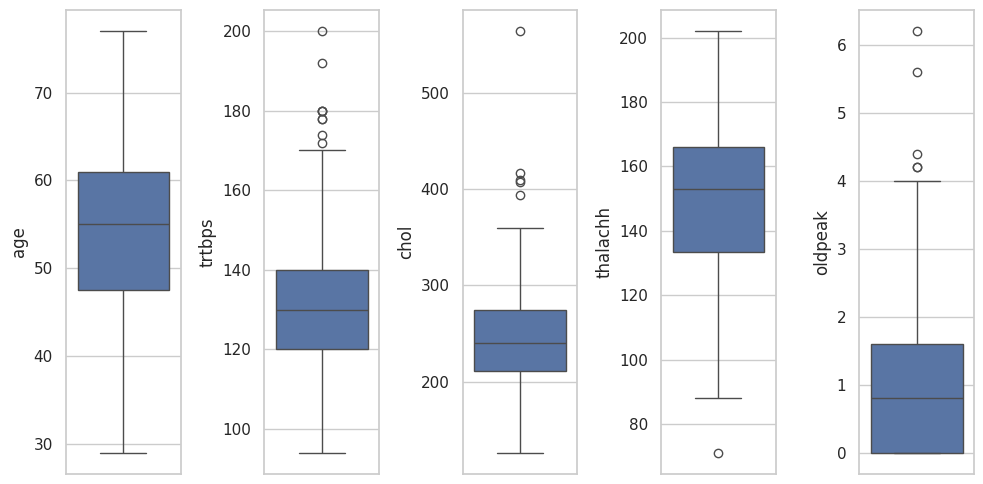

In [ ]:
col_num = ['age', 'trtbps', 'chol', 'thalachh', 'oldpeak']
plt.figure(figsize=(10,5))
for i in range(0,len(col_num)):
    plt.subplot(1,len(col_num),i+1)
    sns.boxplot(y=ha_df[col_num[i]])
    plt.tight_layout()

In [ ]:
for i in col_num:
    Q1 = ha_df[i].quantile(0.25)
    Q3 = ha_df[i].quantile(0.75)
    IQR = Q3-Q1
    LowerBound = Q1 - (1.5 * IQR)
    UpperBound = Q3 + (1.5 * IQR)

    ha_df = ha_df[(ha_df[i] >= LowerBound)&(ha_df[i] <= UpperBound)]

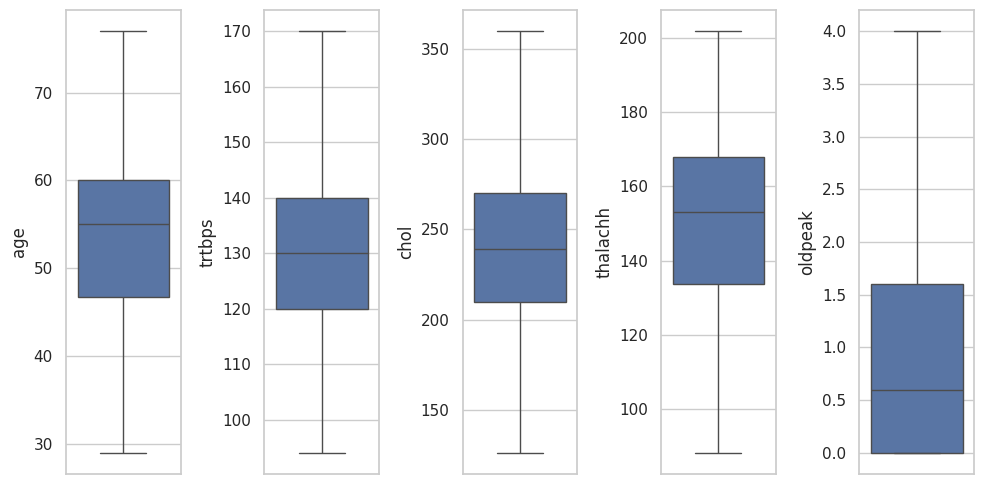

In [ ]:
# Check outliers after handling

col_num = ['age', 'trtbps', 'chol', 'thalachh', 'oldpeak']
plt.figure(figsize=(10,5))
for i in range(0,len(col_num)):
    plt.subplot(1,len(col_num),i+1)
    sns.boxplot(y = ha_df[col_num[i]])
    plt.tight_layout()

In [ ]:
ha_df.shape

(284, 14)

# ***Missing Values***

In [ ]:
# Missing values
ha_df.isna().sum()

,0
age,0
sex,0
cp,0
trtbps,0
chol,0
fbs,0
restecg,0
thalachh,0
exng,0
oldpeak,0


# ***Duplicate Rows***

In [ ]:
# Duplicate data
ha_df.duplicated().sum()

1

In [ ]:
# Remove duplicate rows
ha_df = ha_df.drop_duplicates()

# ***Exploratory Data Analysis (EDA)***

In [ ]:
# Describe statistics for selected numeric columns
ha_df[col_num].describe().transpose()

,count,mean,std,min,25%,50%,75%,max
age,283.0,54.049470,9.128186,29.0,47.0,55.0,60.0,77.0
trtbps,283.0,129.883392,15.387795,94.0,120.0,130.0,140.0,170.0
chol,283.0,242.314488,44.654188,126.0,210.5,239.0,270.5,360.0
thalachh,283.0,149.961131,22.691625,88.0,133.5,153.0,168.0,202.0
oldpeak,283.0,0.951943,1.026400,0.0,0.0,0.6,1.6,4.0


In [ ]:
df = ha_df

In [ ]:
df.columns

Index(['age', 'sex', 'cp', 'trtbps', 'chol', 'fbs', 'restecg', 'thalachh',
       'exng', 'oldpeak', 'slp', 'caa', 'thall', 'output'],
      dtype='object')

In [ ]:
df.columns

Index(['age', 'sex', 'cp', 'trtbps', 'chol', 'fbs', 'restecg', 'thalachh',
       'exng', 'oldpeak', 'slp', 'caa', 'thall', 'output'],
      dtype='object')

# ***Histograms for selected numeric columns***

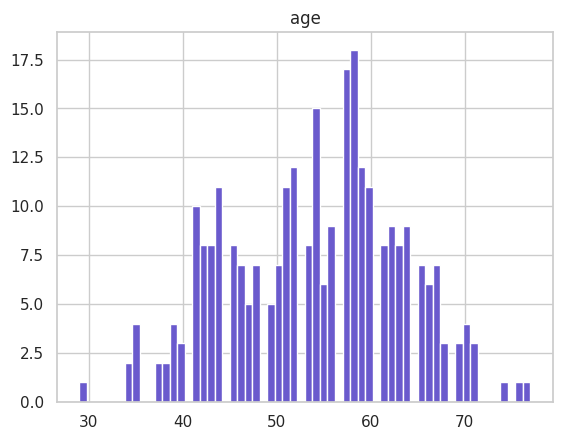

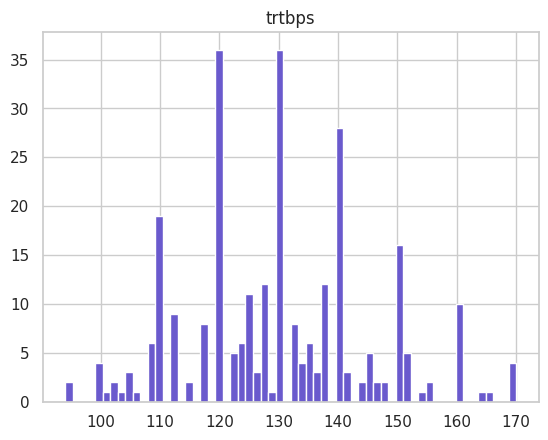

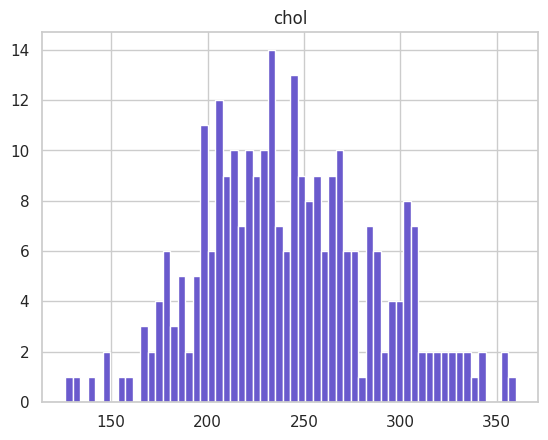

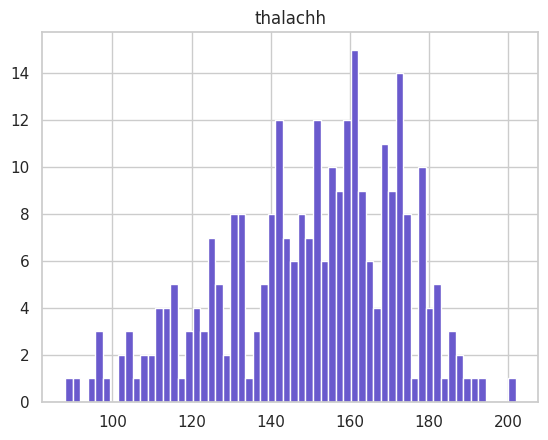

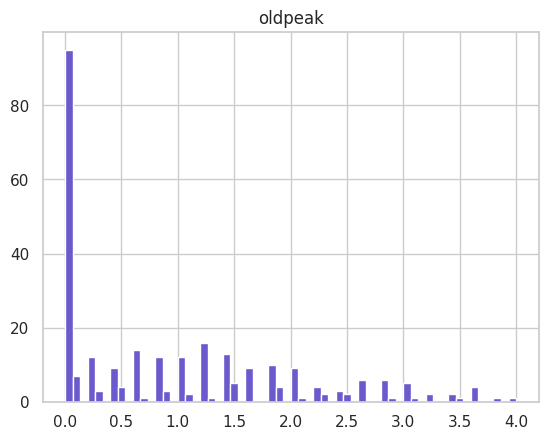

In [ ]:
i = ['age', 'trtbps', 'chol','thalachh','oldpeak']
for j in i:
    plt.hist(df[j],bins = 60, color = 'slateblue')
    plt.title(j)
    plt.show()

# ***Data Prepration***

In [ ]:
from sklearn.model_selection import train_test_split

X = ha_df.drop(["output"], axis=1)
y = ha_df["output"]
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=123
)

In [ ]:
print(f"Total # of sample in whole dataset: {len(X)}")
print(f"Total # of sample in train dataset: {len(X_train)}")
print(f"Total # of sample in test dataset: {len(X_test)}")

Total # of sample in whole dataset: 283
Total # of sample in train dataset: 226
Total # of sample in test dataset: 57


In [ ]:
# Assuming df is your DataFrame
numerical_features = X.select_dtypes(include=["int", "float"]).columns.tolist()

In [ ]:
# Describe statistics for selected numeric columns
ha_df[col_num].describe().transpose()

,count,mean,std,min,25%,50%,75%,max
age,283.0,54.049470,9.128186,29.0,47.0,55.0,60.0,77.0
trtbps,283.0,129.883392,15.387795,94.0,120.0,130.0,140.0,170.0
chol,283.0,242.314488,44.654188,126.0,210.5,239.0,270.5,360.0
thalachh,283.0,149.961131,22.691625,88.0,133.5,153.0,168.0,202.0
oldpeak,283.0,0.951943,1.026400,0.0,0.0,0.6,1.6,4.0


# ***Scaling***

In [ ]:
from sklearn.preprocessing import StandardScaler

# Initialize the StandardScaler object
scaler = StandardScaler()

# Fit the scaler to the numerical features in the training set and transform them
X_train = scaler.fit_transform(X_train)

# Transform the numerical features in the test set using the scaler fitted on the training set
X_test = scaler.transform(X_test)

In [ ]:


# Separate features (X) and target variable (y)
X = ha_df.drop(columns=['output'])  # Replace 'HadHeartAttack' with your actual target column
y = ha_df['output']

# Check if the data loaded correctly
print(X.head())
print(y.head())


   age  sex  cp  trtbps  chol  fbs  restecg  thalachh  exng  oldpeak  slp  \
0   63    1   3     145   233    1        0       150     0      2.3    0   
1   37    1   2     130   250    0        1       187     0      3.5    0   
2   41    0   1     130   204    0        0       172     0      1.4    2   
3   56    1   1     120   236    0        1       178     0      0.8    2   
4   57    0   0     120   354    0        1       163     1      0.6    2   

   caa  thall  
0    0      1  
1    0      2  
2    0      2  
3    0      2  
4    0      2  
0    1
1    1
2    1
3    1
4    1
Name: output, dtype: int64


# ***Split the Data into Training and Testing Sets***

In [ ]:
from sklearn.model_selection import train_test_split

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


# ***Baseline Model Evaluation***

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score, roc_auc_score, confusion_matrix

# Function to evaluate models
def evaluate_model(model, X_test, y_test):
    if hasattr(model, "predict_proba"):
        y_pred_proba = model.predict_proba(X_test)[:, 1]
        auc = roc_auc_score(y_test, y_pred_proba)
    else:
        auc = "N/A"

    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    cm = confusion_matrix(y_test, y_pred)

    return auc, accuracy, recall, precision, f1, cm

# Initialize models
models = {
    'Logistic Regression': LogisticRegression(random_state=42),
    'SVM': SVC(probability=True, random_state=42),
    'Decision Tree': DecisionTreeClassifier(random_state=42),
    'Naive Bayes': GaussianNB(),
    'Gradient Boosting': GradientBoostingClassifier(random_state=42)
}

# Dictionary to store results
results = {
    'Model': [],
    'AUC': [],
    'Accuracy': [],
    'Recall': [],
    'Precision': [],
    'F1-score': [],
    'Confusion Matrix': []
}

# Train and evaluate each model
for model_name, model in models.items():
    model.fit(X_train, y_train)
    auc, accuracy, recall, precision, f1, cm = evaluate_model(model, X_test, y_test)

    results['Model'].append(model_name)
    results['AUC'].append(auc)
    results['Accuracy'].append(accuracy)
    results['Recall'].append(recall)
    results['Precision'].append(precision)
    results['F1-score'].append(f1)
    results['Confusion Matrix'].append(cm)

# Convert results to DataFrame for better visualization
results_df = pd.DataFrame(results)
print(results_df)


                 Model       AUC  Accuracy    Recall  Precision  F1-score  \
0  Logistic Regression  0.874074  0.754386  0.866667   0.722222  0.787879   
1                  SVM  0.675309  0.631579  0.833333   0.609756  0.704225   
2        Decision Tree  0.666667  0.666667  0.666667   0.689655  0.677966   
3          Naive Bayes  0.887654  0.789474  0.833333   0.781250  0.806452   
4    Gradient Boosting  0.909877  0.842105  0.866667   0.838710  0.852459   

      Confusion Matrix  
0  [[17, 10], [4, 26]]  
1  [[11, 16], [5, 25]]  
2  [[18, 9], [10, 20]]  
3   [[20, 7], [5, 25]]  
4   [[22, 5], [4, 26]]  


# ***Apply SMOTE for Class Imbalance Handling***

In [ ]:
from imblearn.over_sampling import SMOTE

# Apply SMOTE to the training data
smote = SMOTE(random_state=42)
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)

print(f'Original training data shape: {X_train.shape}')
print(f'Resampled training data shape: {X_train_smote.shape}')


Original training data shape: (226, 13)
Resampled training data shape: (256, 13)


In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score, roc_auc_score, confusion_matrix
from imblearn.over_sampling import SMOTE
import pandas as pd

# Function to evaluate models
def evaluate_model(model, X_test, y_test):
    if hasattr(model, "predict_proba"):
        y_pred_proba = model.predict_proba(X_test)[:, 1]
        auc = roc_auc_score(y_test, y_pred_proba)
    else:
        auc = "N/A"

    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    cm = confusion_matrix(y_test, y_pred)

    return auc, accuracy, recall, precision, f1, cm

# Apply SMOTE to the training data
smote = SMOTE(random_state=42)
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)

print(f'Original training data shape: {X_train.shape}')
print(f'Resampled training data shape: {X_train_smote.shape}')

# Initialize models
models = {
    'Logistic Regression': LogisticRegression(random_state=42),
    'SVM': SVC(probability=True, random_state=42),
    'Decision Tree': DecisionTreeClassifier(random_state=42),
    'Naive Bayes': GaussianNB(),
    'Gradient Boosting': GradientBoostingClassifier(random_state=42)
}

# Dictionary to store results
results = {
    'Model': [],
    'AUC': [],
    'Accuracy': [],
    'Recall': [],
    'Precision': [],
    'F1-score': [],
    'Confusion Matrix': []
}

# Train and evaluate each model on SMOTE-resampled data
for model_name, model in models.items():
    model.fit(X_train_smote, y_train_smote)  # Train with SMOTE data
    auc, accuracy, recall, precision, f1, cm = evaluate_model(model, X_test, y_test)

    results['Model'].append(model_name)
    results['AUC'].append(auc)
    results['Accuracy'].append(accuracy)
    results['Recall'].append(recall)
    results['Precision'].append(precision)
    results['F1-score'].append(f1)
    results['Confusion Matrix'].append(cm)

# Convert results to DataFrame for better visualization
results_df = pd.DataFrame(results)
print(results_df)


Original training data shape: (226, 13)
Resampled training data shape: (256, 13)
                 Model       AUC  Accuracy    Recall  Precision  F1-score  \
0  Logistic Regression  0.891358  0.807018  0.900000   0.771429  0.830769   
1                  SVM  0.680247  0.649123  0.666667   0.666667  0.666667   
2        Decision Tree  0.753704  0.754386  0.766667   0.766667  0.766667   
3          Naive Bayes  0.874074  0.754386  0.766667   0.766667  0.766667   
4    Gradient Boosting  0.871605  0.771930  0.766667   0.793103  0.779661   

       Confusion Matrix  
0    [[19, 8], [3, 27]]  
1  [[17, 10], [10, 20]]  
2    [[20, 7], [7, 23]]  
3    [[20, 7], [7, 23]]  
4    [[21, 6], [7, 23]]  


## ***Perform Feature Selection***
 1 **Random Forest Feature Selection**

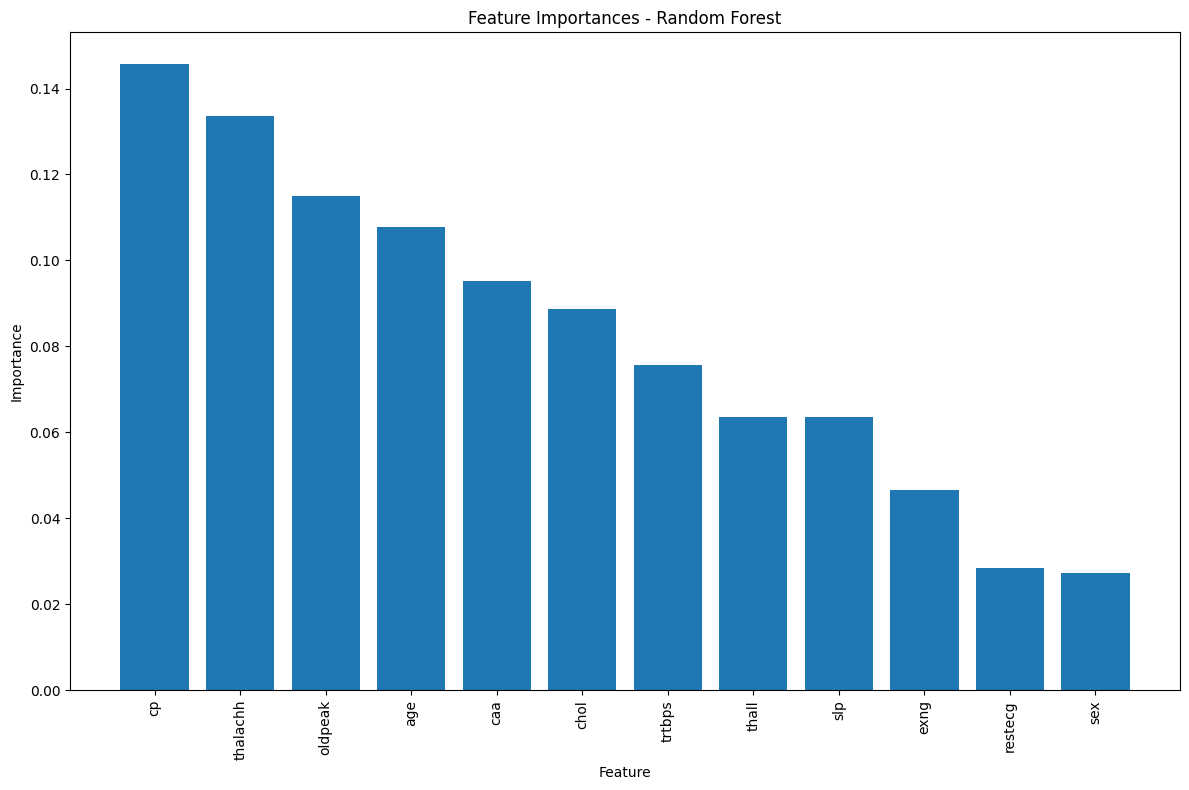

RF Selected Features: ['age', 'sex', 'cp', 'trtbps', 'chol', 'restecg', 'thalachh', 'exng', 'oldpeak', 'slp', 'caa', 'thall']


In [ ]:
from sklearn.ensemble import RandomForestClassifier
import numpy as np
import matplotlib.pyplot as plt

# Train a Random Forest model on the SMOTE-balanced data
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train_smote, y_train_smote)

# Get the feature importances from the Random Forest model
importances = rf_model.feature_importances_
indices = np.argsort(importances)[::-1]

# Select top features based on a threshold
threshold = 0.01  # You can set this threshold based on your requirements
important_features_rf = [feature for feature, importance in zip(X.columns, importances) if importance > threshold]

# Create new datasets with only the selected features
X_train_rf_selected = X_train_smote[important_features_rf]
X_test_rf_selected = X_test[important_features_rf]

# Plot feature importances
plt.figure(figsize=(12, 8))
plt.title("Feature Importances - Random Forest")
plt.bar(range(X_train_rf_selected.shape[1]), importances[indices][:len(important_features_rf)], align="center")
plt.xticks(range(X_train_rf_selected.shape[1]), np.array(X.columns)[indices][:len(important_features_rf)], rotation=90)
plt.xlabel("Feature")
plt.ylabel("Importance")
plt.tight_layout()
plt.show()

print(f"RF Selected Features: {important_features_rf}")


# ***2 Genetic Algorithm (GA) Feature Selection***

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 84.1/84.1 kB 3.5 MB/s eta 0:00:00


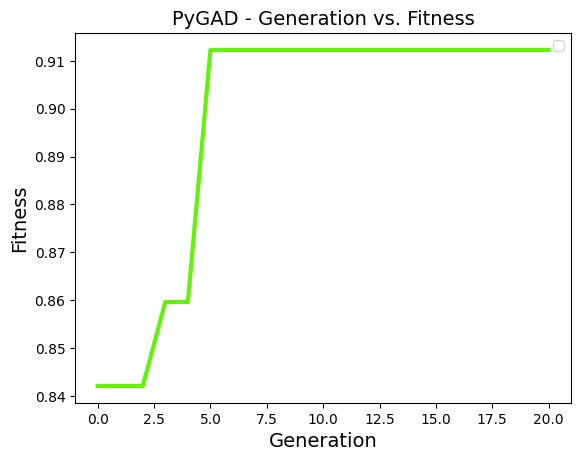

GA Selected Features: Index(['sex', 'trtbps', 'oldpeak', 'caa', 'thall'], dtype='object')


In [ ]:
!pip install pygad
import pygad
from sklearn.preprocessing import StandardScaler
from keras.models import Sequential
from keras.layers import Dense

# Standardize the RF-selected data
scaler = StandardScaler()
X_train_rf_selected_scaled = scaler.fit_transform(X_train_rf_selected)
X_test_rf_selected_scaled = scaler.transform(X_test_rf_selected)

# Define the ANN model used in the fitness function for GA
def create_ann(input_size):
    model = Sequential()
    model.add(Dense(64, input_dim=input_size, activation='relu'))
    model.add(Dense(32, activation='relu'))
    model.add(Dense(1, activation='sigmoid'))  # Binary classification
    model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
    return model

# Define the fitness function for GA
def fitness_func(ga_instance, solution, solution_idx):
    selected_features_indices = np.where(solution == 1)[0]
    X_train_selected = X_train_rf_selected_scaled[:, selected_features_indices]
    X_test_selected = X_test_rf_selected_scaled[:, selected_features_indices]

    if len(selected_features_indices) == 0:
        return 0

    # Create and train the ANN model
    model = create_ann(X_train_selected.shape[1])
    model.fit(X_train_selected, y_train_smote, epochs=10, batch_size=32, verbose=0)
    accuracy = model.evaluate(X_test_selected, y_test, verbose=0)[1]

    return accuracy

# Define GA parameters
num_generations = 20  # Reduced to speed up execution
num_parents_mating = 4
sol_per_pop = 10
num_genes = X_train_rf_selected.shape[1]
gene_space = [0, 1]

# Create the GA instance
ga_instance = pygad.GA(
    num_generations=num_generations,
    num_parents_mating=num_parents_mating,
    fitness_func=fitness_func,
    sol_per_pop=sol_per_pop,
    num_genes=num_genes,
    gene_space=gene_space,
    mutation_type="random",
    crossover_type="single_point",
    mutation_percent_genes=10,
    parent_selection_type="tournament",
    keep_parents=2
)

# Run the GA to perform feature selection
ga_instance.run()

# Plot the GA progress
ga_instance.plot_fitness()

# Get the best solution (selected features)
best_solution, best_solution_fitness, best_solution_idx = ga_instance.best_solution()
selected_features_ga = np.where(best_solution == 1)[0]
X_train_ga_selected = X_train_rf_selected.iloc[:, selected_features_ga]
X_test_ga_selected = X_test_rf_selected.iloc[:, selected_features_ga]

print("GA Selected Features:", X_train_rf_selected.columns[selected_features_ga])


# ***Train and Evaluate Models Using RF and GA Selected Features***

## ***1 Train and Evaluate Models on RF-Selected Features***

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score, roc_auc_score, confusion_matrix
import pandas as pd

# Dictionary to store model evaluation results
results_rf = {
    'Model': [],
    'AUC': [],
    'Accuracy': [],
    'Recall': [],
    'Precision': [],
    'F1-score': [],
    'Confusion Matrix': []
}

# List of models for evaluation
models = {
    'Logistic Regression': LogisticRegression(random_state=42),
    'SVM': SVC(probability=True, random_state=42),
    'Decision Tree': DecisionTreeClassifier(random_state=42),
    'Naive Bayes': GaussianNB(),
    'Gradient Boosting': GradientBoostingClassifier(random_state=42)
}

# Train and evaluate each model using the RF-selected features
for model_name, model in models.items():
    # Train the model
    model.fit(X_train_rf_selected, y_train_smote)

    # Predict and evaluate the model
    if hasattr(model, "predict_proba"):
        y_pred_proba = model.predict_proba(X_test_rf_selected)[:, 1]
        auc = roc_auc_score(y_test, y_pred_proba)
    else:
        auc = "N/A"

    y_pred = model.predict(X_test_rf_selected)
    accuracy = accuracy_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    cm = confusion_matrix(y_test, y_pred)

    # Append the results to the dictionary
    results_rf['Model'].append(model_name)
    results_rf['AUC'].append(auc)
    results_rf['Accuracy'].append(accuracy)
    results_rf['Recall'].append(recall)
    results_rf['Precision'].append(precision)
    results_rf['F1-score'].append(f1)
    results_rf['Confusion Matrix'].append(cm)

# Convert the results dictionary to a DataFrame for better visualization
results_rf_df = pd.DataFrame(results_rf)

# Display the results
print("Evaluation Results for RF-Selected Features:")
print(results_rf_df)


Evaluation Results for RF-Selected Features:
                 Model       AUC  Accuracy    Recall  Precision  F1-score  \
0  Logistic Regression  0.887654  0.789474  0.866667   0.764706  0.812500   
1                  SVM  0.680247  0.649123  0.666667   0.666667  0.666667   
2        Decision Tree  0.755556  0.754386  0.733333   0.785714  0.758621   
3          Naive Bayes  0.872840  0.771930  0.800000   0.774194  0.786885   
4    Gradient Boosting  0.879012  0.807018  0.800000   0.827586  0.813559   

       Confusion Matrix  
0    [[19, 8], [4, 26]]  
1  [[17, 10], [10, 20]]  
2    [[21, 6], [8, 22]]  
3    [[20, 7], [6, 24]]  
4    [[22, 5], [6, 24]]  


## ***2 Train and Evaluate Models on GA-Selected Features***

In [ ]:
# Dictionary to store model evaluation results for GA
results_ga = {
    'Model': [],
    'AUC': [],
    'Accuracy': [],
    'Recall': [],
    'Precision': [],
    'F1-score': [],
    'Confusion Matrix': []
}

# Train and evaluate each model using the GA-selected features
for model_name, model in models.items():
    # Train the model
    model.fit(X_train_ga_selected, y_train_smote)

    # Predict and evaluate the model
    if hasattr(model, "predict_proba"):
        y_pred_proba = model.predict_proba(X_test_ga_selected)[:, 1]
        auc = roc_auc_score(y_test, y_pred_proba)
    else:
        auc = "N/A"

    y_pred = model.predict(X_test_ga_selected)
    accuracy = accuracy_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    cm = confusion_matrix(y_test, y_pred)

    # Append the results to the dictionary
    results_ga['Model'].append(model_name + " + GA")
    results_ga['AUC'].append(auc)
    results_ga['Accuracy'].append(accuracy)
    results_ga['Recall'].append(recall)
    results_ga['Precision'].append(precision)
    results_ga['F1-score'].append(f1)
    results_ga['Confusion Matrix'].append(cm)

# Convert the results dictionary to a DataFrame for better visualization
results_ga_df = pd.DataFrame(results_ga)

# Display the results
print("Evaluation Results for GA-Selected Features:")
print(results_ga_df)


Evaluation Results for GA-Selected Features:
                      Model       AUC  Accuracy    Recall  Precision  \
0  Logistic Regression + GA  0.893827  0.877193  0.966667   0.828571   
1                  SVM + GA  0.520988  0.526316  0.466667   0.560000   
2        Decision Tree + GA  0.798148  0.807018  0.833333   0.806452   
3          Naive Bayes + GA  0.912346  0.842105  0.800000   0.888889   
4    Gradient Boosting + GA  0.867284  0.842105  0.866667   0.838710   

   F1-score      Confusion Matrix  
0  0.892308    [[21, 6], [1, 29]]  
1  0.509091  [[16, 11], [16, 14]]  
2  0.819672    [[21, 6], [5, 25]]  
3  0.842105    [[24, 3], [6, 24]]  
4  0.852459    [[22, 5], [4, 26]]  


# ***3: Compare RF and GA Results***

In [ ]:
# Combine the results for both RF and GA for comparison
all_results_df = pd.concat([results_rf_df, results_ga_df], ignore_index=True)

# Display the combined results for comparison
print("Combined Evaluation Results for RF and GA Selected Features:")
print(all_results_df)

# Save the results to a CSV file for further analysis if needed
all_results_df.to_csv('model_comparison_rf_ga_results.csv', index=False)


Combined Evaluation Results for RF and GA Selected Features:
                      Model       AUC  Accuracy    Recall  Precision  \
0       Logistic Regression  0.887654  0.789474  0.866667   0.764706   
1                       SVM  0.680247  0.649123  0.666667   0.666667   
2             Decision Tree  0.755556  0.754386  0.733333   0.785714   
3               Naive Bayes  0.872840  0.771930  0.800000   0.774194   
4         Gradient Boosting  0.879012  0.807018  0.800000   0.827586   
5  Logistic Regression + GA  0.893827  0.877193  0.966667   0.828571   
6                  SVM + GA  0.520988  0.526316  0.466667   0.560000   
7        Decision Tree + GA  0.798148  0.807018  0.833333   0.806452   
8          Naive Bayes + GA  0.912346  0.842105  0.800000   0.888889   
9    Gradient Boosting + GA  0.867284  0.842105  0.866667   0.838710   

   F1-score      Confusion Matrix  
0  0.812500    [[19, 8], [4, 26]]  
1  0.666667  [[17, 10], [10, 20]]  
2  0.758621    [[21, 6], [8, 22]]  
3 

# ***Plotting Confusion Matrices for Each Model***

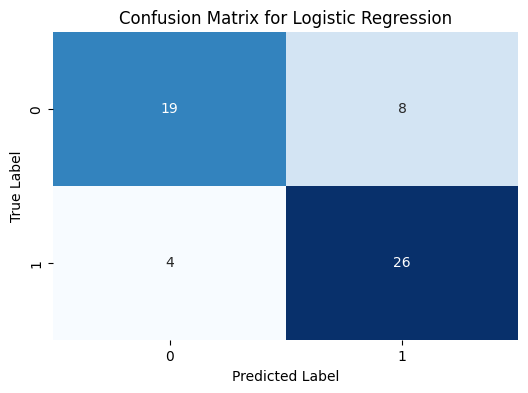

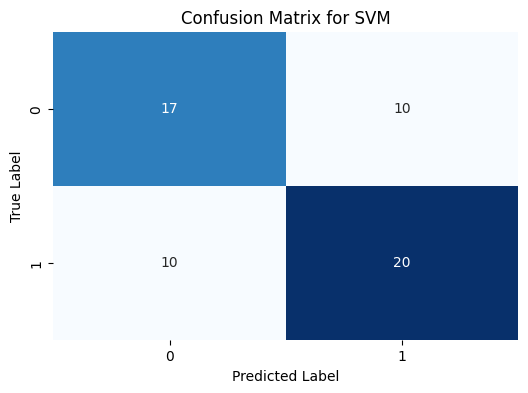

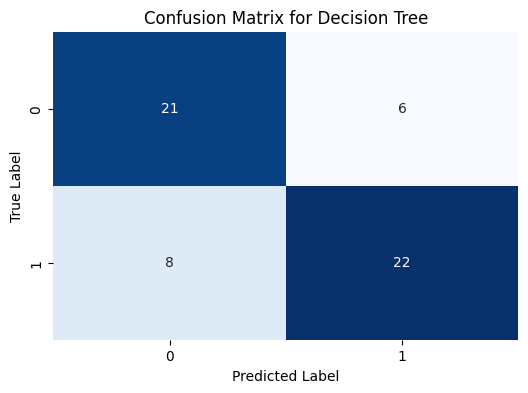

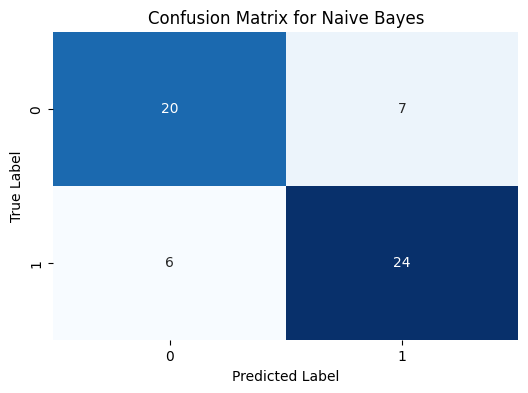

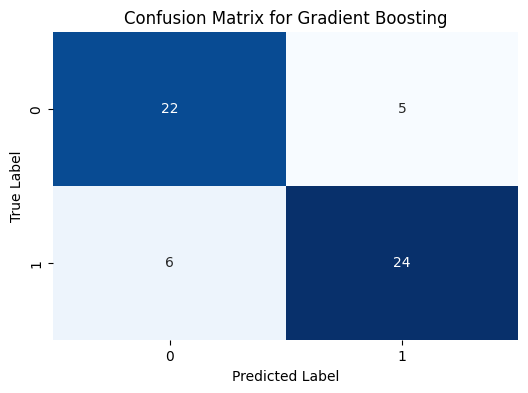

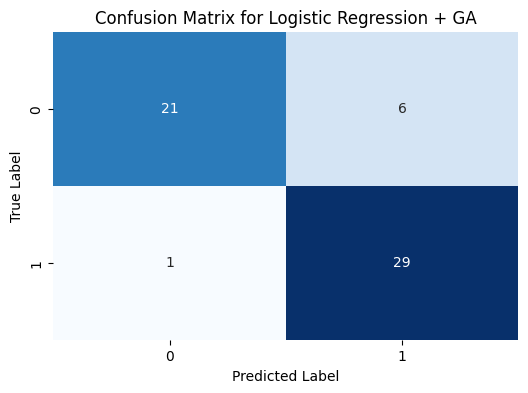

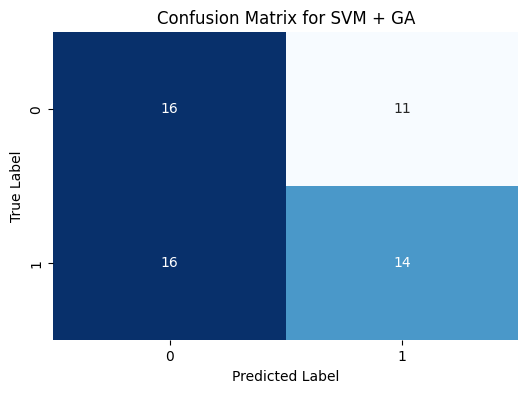

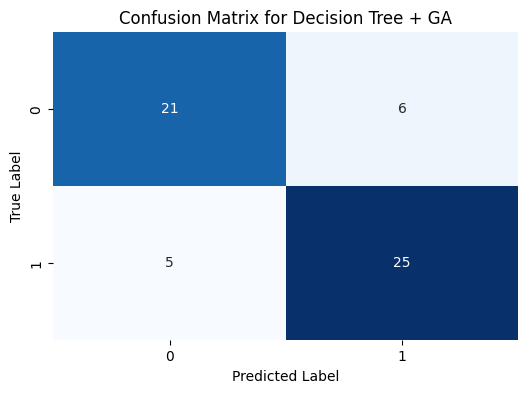

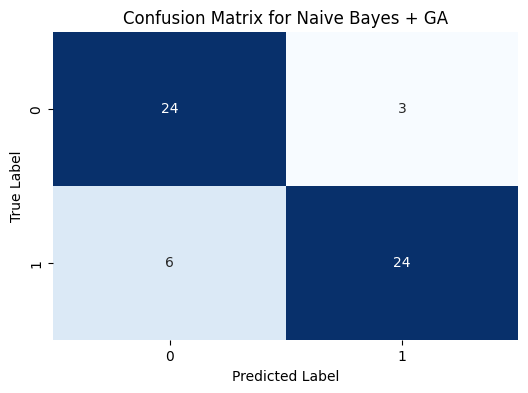

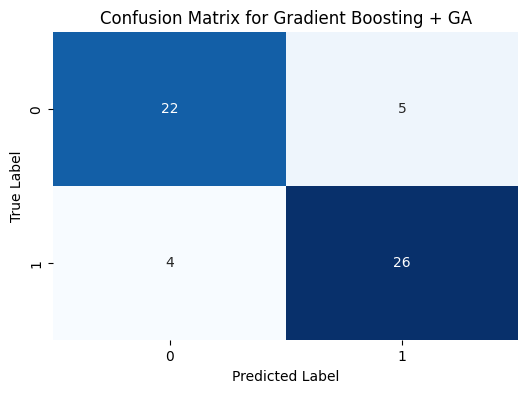

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plot confusion matrices for each model
for model_name, cm in zip(all_results_df['Model'], all_results_df['Confusion Matrix']):
    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
    plt.title(f'Confusion Matrix for {model_name}')
    plt.xlabel('Predicted Label')
    plt.ylabel('True Label')
    plt.show()


# ***1 Define Hyperparameters for Each Model***

In [ ]:
from sklearn.model_selection import GridSearchCV

# For Logistic Regression
param_grid_lr = {
    'C': [0.1, 1, 10, 100],
    'solver': ['liblinear', 'lbfgs']
}

# For SVM
param_grid_svm = {
    'C': [0.1, 1, 10],
    'kernel': ['linear', 'poly', 'sigmoid']
}

# For Decision Tree
param_grid_dt = {
    'max_depth': [None, 5, 10, 15],
    'min_samples_split': [2, 5, 10]
}

# For Naive Bayes (no parameters to tune, left empty)
param_grid_nb = {
    # No hyperparameters for Naive Bayes
}

# For Gradient Boosting
param_grid_gb = {
    'n_estimators': [50, 100, 150],
    'learning_rate': [0.01, 0.1, 0.5],
    'max_depth': [3, 5, 7]
}

# Dictionary to store parameter grids for each model
param_grids = {
    'Logistic Regression': param_grid_lr,
    'SVM': param_grid_svm,
    'Decision Tree': param_grid_dt,
    'Naive Bayes': param_grid_nb,  # No tuning
    'Gradient Boosting': param_grid_gb
}

# Perform hyperparameter tuning using GridSearchCV
tuned_models = {}
for model_name, model in models.items():
    if model_name in param_grids:
        param_grid = param_grids[model_name]
        grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=5, scoring='accuracy', n_jobs=-1)
        grid_search.fit(X_train_ga_selected, y_train_smote)
        tuned_models[model_name] = grid_search.best_estimator_
    else:
        # If no hyperparameters to tune, use the default model
        tuned_models[model_name] = model

print("Hyperparameter tuning completed.")


Hyperparameter tuning completed.


# ***Hyperparameter Tuning with Grid Search***

In [ ]:
# Dictionary to store the tuned models
tuned_models = {}

# Perform hyperparameter tuning using GridSearchCV
for model_name, model in models.items():
    if model_name in param_grids:
        param_grid = param_grids[model_name]
        grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=5, scoring='accuracy', n_jobs=-1)
        grid_search.fit(X_train_ga_selected, y_train_smote)
        tuned_models[model_name] = grid_search.best_estimator_
        print(f"Best parameters for {model_name}: {grid_search.best_params_}")
    else:
        # If no hyperparameters to tune, use the default model
        tuned_models[model_name] = model


Best parameters for Logistic Regression: {'C': 1, 'solver': 'lbfgs'}
Best parameters for SVM: {'C': 0.1, 'kernel': 'linear'}
Best parameters for Decision Tree: {'max_depth': 10, 'min_samples_split': 5}
Best parameters for Naive Bayes: {}
Best parameters for Gradient Boosting: {'learning_rate': 0.01, 'max_depth': 3, 'n_estimators': 150}


# ***3 Evaluate Tuned Models Using GA-Selected Features***

In [ ]:
# Dictionary to store tuned model evaluation results
tuned_results_ga = {
    'Model': [],
    'AUC': [],
    'Accuracy': [],
    'Recall': [],
    'Precision': [],
    'F1-score': [],
    'Confusion Matrix': []
}

# Evaluate tuned models on the GA-selected features
for model_name, model in tuned_models.items():
    # Train the model
    model.fit(X_train_ga_selected, y_train_smote)

    # Predict and evaluate the model
    if hasattr(model, "predict_proba"):
        y_pred_proba = model.predict_proba(X_test_ga_selected)[:, 1]
        auc = roc_auc_score(y_test, y_pred_proba)
    else:
        auc = "N/A"

    y_pred = model.predict(X_test_ga_selected)
    accuracy = accuracy_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    cm = confusion_matrix(y_test, y_pred)

    # Append the results to the dictionary
    tuned_results_ga['Model'].append(model_name + " + GA (Tuned)")
    tuned_results_ga['AUC'].append(auc)
    tuned_results_ga['Accuracy'].append(accuracy)
    tuned_results_ga['Recall'].append(recall)
    tuned_results_ga['Precision'].append(precision)
    tuned_results_ga['F1-score'].append(f1)
    tuned_results_ga['Confusion Matrix'].append(cm)

# Convert the results dictionary to a DataFrame for better visualization
tuned_results_ga_df = pd.DataFrame(tuned_results_ga)

# Display the tuned model results for GA-selected features
print("Tuned Model Results for GA-Selected Features:")
print(tuned_results_ga_df)


Tuned Model Results for GA-Selected Features:
                              Model       AUC  Accuracy    Recall  Precision  \
0  Logistic Regression + GA (Tuned)  0.893827  0.877193  0.966667   0.828571   
1                  SVM + GA (Tuned)  0.898765  0.877193  0.933333   0.848485   
2        Decision Tree + GA (Tuned)  0.838889  0.789474  0.833333   0.781250   
3          Naive Bayes + GA (Tuned)  0.912346  0.842105  0.800000   0.888889   
4    Gradient Boosting + GA (Tuned)  0.951852  0.912281  0.966667   0.878788   

   F1-score    Confusion Matrix  
0  0.892308  [[21, 6], [1, 29]]  
1  0.888889  [[22, 5], [2, 28]]  
2  0.806452  [[20, 7], [5, 25]]  
3  0.842105  [[24, 3], [6, 24]]  
4  0.920635  [[23, 4], [1, 29]]  


# ***4 Hyperparameter Tuning Using RF-Selected Features***

In [ ]:
# Repeat the hyperparameter tuning process for RF-selected features

tuned_results_rf = {
    'Model': [],
    'AUC': [],
    'Accuracy': [],
    'Recall': [],
    'Precision': [],
    'F1-score': [],
    'Confusion Matrix': []
}

# Evaluate tuned models on the RF-selected features
for model_name, model in tuned_models.items():
    # Train the model
    model.fit(X_train_rf_selected, y_train_smote)

    # Predict and evaluate the model
    if hasattr(model, "predict_proba"):
        y_pred_proba = model.predict_proba(X_test_rf_selected)[:, 1]
        auc = roc_auc_score(y_test, y_pred_proba)
    else:
        auc = "N/A"

    y_pred = model.predict(X_test_rf_selected)
    accuracy = accuracy_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    cm = confusion_matrix(y_test, y_pred)

    # Append the results to the dictionary
    tuned_results_rf['Model'].append(model_name + " + RF (Tuned)")
    tuned_results_rf['AUC'].append(auc)
    tuned_results_rf['Accuracy'].append(accuracy)
    tuned_results_rf['Recall'].append(recall)
    tuned_results_rf['Precision'].append(precision)
    tuned_results_rf['F1-score'].append(f1)
    tuned_results_rf['Confusion Matrix'].append(cm)

# Convert the results dictionary to a DataFrame for better visualization
tuned_results_rf_df = pd.DataFrame(tuned_results_rf)

# Display the tuned model results for RF-selected features
print("Tuned Model Results for RF-Selected Features:")
print(tuned_results_rf_df)


Tuned Model Results for RF-Selected Features:
                              Model       AUC  Accuracy    Recall  Precision  \
0  Logistic Regression + RF (Tuned)  0.887654  0.789474  0.866667   0.764706   
1                  SVM + RF (Tuned)  0.893827  0.789474  0.900000   0.750000   
2        Decision Tree + RF (Tuned)  0.732099  0.736842  0.766667   0.741935   
3          Naive Bayes + RF (Tuned)  0.872840  0.771930  0.800000   0.774194   
4    Gradient Boosting + RF (Tuned)  0.901235  0.842105  0.900000   0.818182   

   F1-score    Confusion Matrix  
0  0.812500  [[19, 8], [4, 26]]  
1  0.818182  [[18, 9], [3, 27]]  
2  0.754098  [[19, 8], [7, 23]]  
3  0.786885  [[20, 7], [6, 24]]  
4  0.857143  [[21, 6], [3, 27]]  


# ***5 Combine Results for Comparison***

In [ ]:
# Combine the results for RF and GA tuned models for comparison
all_tuned_results_df = pd.concat([tuned_results_ga_df, tuned_results_rf_df], ignore_index=True)

# Display the combined results
print("Combined Tuned Model Results for RF and GA Selected Features:")
print(all_tuned_results_df)

# Save the results to a CSV file if needed
all_tuned_results_df.to_csv('tuned_model_comparison_rf_ga_results.csv', index=False)


Combined Tuned Model Results for RF and GA Selected Features:
                              Model       AUC  Accuracy    Recall  Precision  \
0  Logistic Regression + GA (Tuned)  0.893827  0.877193  0.966667   0.828571   
1                  SVM + GA (Tuned)  0.898765  0.877193  0.933333   0.848485   
2        Decision Tree + GA (Tuned)  0.838889  0.789474  0.833333   0.781250   
3          Naive Bayes + GA (Tuned)  0.912346  0.842105  0.800000   0.888889   
4    Gradient Boosting + GA (Tuned)  0.951852  0.912281  0.966667   0.878788   
5  Logistic Regression + RF (Tuned)  0.887654  0.789474  0.866667   0.764706   
6                  SVM + RF (Tuned)  0.893827  0.789474  0.900000   0.750000   
7        Decision Tree + RF (Tuned)  0.732099  0.736842  0.766667   0.741935   
8          Naive Bayes + RF (Tuned)  0.872840  0.771930  0.800000   0.774194   
9    Gradient Boosting + RF (Tuned)  0.901235  0.842105  0.900000   0.818182   

   F1-score    Confusion Matrix  
0  0.892308  [[21, 6], 

# ***1 Evaluate RBF SVM for Baseline Performance***

In [ ]:
from sklearn.svm import SVC

# Initialize RBF SVM model
rbf_svm_baseline = SVC(kernel='rbf', probability=True, random_state=42)

# Train the RBF SVM model on the original training data
rbf_svm_baseline.fit(X_train, y_train)

# Evaluate the RBF SVM model
def evaluate_rbf_model(model, X_test, y_test):
    y_pred_proba = model.predict_proba(X_test)[:, 1]
    auc = roc_auc_score(y_test, y_pred_proba)
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    cm = confusion_matrix(y_test, y_pred)
    return auc, accuracy, recall, precision, f1, cm

# Evaluate the RBF SVM model using baseline data
auc, accuracy, recall, precision, f1, cm = evaluate_rbf_model(rbf_svm_baseline, X_test, y_test)

# Display baseline results
baseline_results_df = pd.DataFrame({
    'Model': ['RBF SVM (Baseline)'],
    'AUC': [auc],
    'Accuracy': [accuracy],
    'Recall': [recall],
    'Precision': [precision],
    'F1-score': [f1],
    'Confusion Matrix': [cm]
})

print("RBF SVM Baseline Performance:")
print(baseline_results_df)


RBF SVM Baseline Performance:
                Model       AUC  Accuracy    Recall  Precision  F1-score  \
0  RBF SVM (Baseline)  0.675309  0.631579  0.833333   0.609756  0.704225   

      Confusion Matrix  
0  [[11, 16], [5, 25]]  


# ***2 Evaluate RBF SVM with SMOTE***

In [ ]:
# Train RBF SVM on the SMOTE-balanced data
rbf_svm_smote = SVC(kernel='rbf', probability=True, random_state=42)
rbf_svm_smote.fit(X_train_smote, y_train_smote)

# Evaluate the RBF SVM model on the SMOTE data
auc, accuracy, recall, precision, f1, cm = evaluate_rbf_model(rbf_svm_smote, X_test, y_test)

# Save the results to DataFrame
smote_results_df = pd.DataFrame({
    'Model': ['RBF SVM (SMOTE)'],
    'AUC': [auc],
    'Accuracy': [accuracy],
    'Recall': [recall],
    'Precision': [precision],
    'F1-score': [f1],
    'Confusion Matrix': [cm]
})

print("RBF SVM SMOTE Performance:")
print(smote_results_df)


RBF SVM SMOTE Performance:
             Model       AUC  Accuracy    Recall  Precision  F1-score  \
0  RBF SVM (SMOTE)  0.680247  0.649123  0.666667   0.666667  0.666667   

       Confusion Matrix  
0  [[17, 10], [10, 20]]  


# ***3 Evaluate RBF SVM with RF-Selected Features***

In [ ]:
# Train RBF SVM on the RF-selected features
rbf_svm_rf = SVC(kernel='rbf', probability=True, random_state=42)
rbf_svm_rf.fit(X_train_rf_selected, y_train_smote)

# Evaluate the RBF SVM model on the RF-selected features
auc, accuracy, recall, precision, f1, cm = evaluate_rbf_model(rbf_svm_rf, X_test_rf_selected, y_test)

# Save the results to DataFrame
rf_results_df = pd.DataFrame({
    'Model': ['RBF SVM (RF Selected Features)'],
    'AUC': [auc],
    'Accuracy': [accuracy],
    'Recall': [recall],
    'Precision': [precision],
    'F1-score': [f1],
    'Confusion Matrix': [cm]
})

print("RBF SVM RF Selected Features Performance:")
print(rf_results_df)


RBF SVM RF Selected Features Performance:
                            Model       AUC  Accuracy    Recall  Precision  \
0  RBF SVM (RF Selected Features)  0.680247  0.649123  0.666667   0.666667   

   F1-score      Confusion Matrix  
0  0.666667  [[17, 10], [10, 20]]  


# ***4 Evaluate RBF SVM with GA-Selected Features***

In [ ]:
# Train RBF SVM on the GA-selected features
rbf_svm_ga = SVC(kernel='rbf', probability=True, random_state=42)
rbf_svm_ga.fit(X_train_ga_selected, y_train_smote)

# Evaluate the RBF SVM model on the GA-selected features
auc, accuracy, recall, precision, f1, cm = evaluate_rbf_model(rbf_svm_ga, X_test_ga_selected, y_test)

# Save the results to DataFrame
ga_results_df = pd.DataFrame({
    'Model': ['RBF SVM (GA Selected Features)'],
    'AUC': [auc],
    'Accuracy': [accuracy],
    'Recall': [recall],
    'Precision': [precision],
    'F1-score': [f1],
    'Confusion Matrix': [cm]
})

print("RBF SVM GA Selected Features Performance:")
print(ga_results_df)


RBF SVM GA Selected Features Performance:
                            Model       AUC  Accuracy    Recall  Precision  \
0  RBF SVM (GA Selected Features)  0.520988  0.526316  0.466667       0.56   

   F1-score      Confusion Matrix  
0  0.509091  [[16, 11], [16, 14]]  


# ***5 Hyperparameter Tuning for RBF SVM***

In [ ]:
# Perform hyperparameter tuning for RBF SVM using GridSearchCV
param_grid_rbf = {'C': [0.1, 1, 10], 'gamma': [0.01, 0.1, 1]}
grid_search_rbf = GridSearchCV(SVC(kernel='rbf', probability=True), param_grid_rbf, cv=5, scoring='accuracy')
grid_search_rbf.fit(X_train_rf_selected, y_train_smote)

# Get the best RBF SVM model from GridSearchCV
best_rbf_svm = grid_search_rbf.best_estimator_

# Evaluate the tuned RBF SVM model on the RF-selected features
auc, accuracy, recall, precision, f1, cm = evaluate_rbf_model(best_rbf_svm, X_test_rf_selected, y_test)

# Save the results to DataFrame
rbf_tuned_results_df = pd.DataFrame({
    'Model': ['RBF SVM (Tuned)'],
    'AUC': [auc],
    'Accuracy': [accuracy],
    'Recall': [recall],
    'Precision': [precision],
    'F1-score': [f1],
    'Confusion Matrix': [cm]
})

print("RBF SVM Tuned Performance:")
print(rbf_tuned_results_df)


RBF SVM Tuned Performance:
             Model       AUC  Accuracy  Recall  Precision  F1-score  \
0  RBF SVM (Tuned)  0.498765  0.473684     0.6        0.5  0.545455   

      Confusion Matrix  
0  [[9, 18], [12, 18]]  


# ***6 Combine All RBF SVM Results for Comparison***

In [ ]:
# Combine all RBF SVM evaluation results for comparison
all_rbf_results_df = pd.concat([baseline_results_df, smote_results_df, rf_results_df, ga_results_df, rbf_tuned_results_df], ignore_index=True)

# Display the combined results
print("Combined RBF SVM Results for Different Scenarios:")
print(all_rbf_results_df)

# Save the results to a CSV file if needed
all_rbf_results_df.to_csv('rbf_svm_comparison_results.csv', index=False)


Combined RBF SVM Results for Different Scenarios:
                            Model       AUC  Accuracy    Recall  Precision  \
0              RBF SVM (Baseline)  0.675309  0.631579  0.833333   0.609756   
1                 RBF SVM (SMOTE)  0.680247  0.649123  0.666667   0.666667   
2  RBF SVM (RF Selected Features)  0.680247  0.649123  0.666667   0.666667   
3  RBF SVM (GA Selected Features)  0.520988  0.526316  0.466667   0.560000   
4                 RBF SVM (Tuned)  0.498765  0.473684  0.600000   0.500000   

   F1-score      Confusion Matrix  
0  0.704225   [[11, 16], [5, 25]]  
1  0.666667  [[17, 10], [10, 20]]  
2  0.666667  [[17, 10], [10, 20]]  
3  0.509091  [[16, 11], [16, 14]]  
4  0.545455   [[9, 18], [12, 18]]  


                              Model       AUC  Accuracy    Recall  Precision  \
0  Logistic Regression + GA (Tuned)  0.893827  0.877193  0.966667   0.828571   
1                  SVM + GA (Tuned)  0.898765  0.877193  0.933333   0.848485   
2        Decision Tree + GA (Tuned)  0.838889  0.789474  0.833333   0.781250   
3          Naive Bayes + GA (Tuned)  0.912346  0.842105  0.800000   0.888889   
4    Gradient Boosting + GA (Tuned)  0.951852  0.912281  0.966667   0.878788   

   F1-score    Confusion Matrix  
0  0.892308  [[21, 6], [1, 29]]  
1  0.888889  [[22, 5], [2, 28]]  
2  0.806452  [[20, 7], [5, 25]]  
3  0.842105  [[24, 3], [6, 24]]  
4  0.920635  [[23, 4], [1, 29]]  


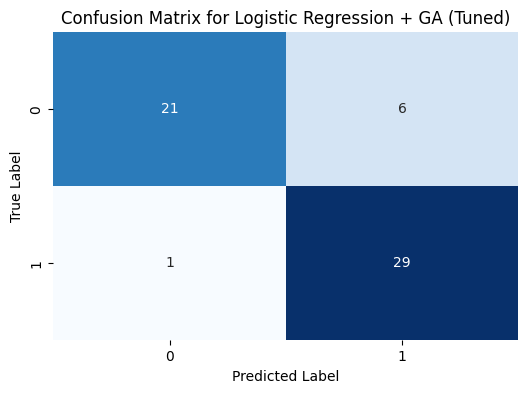

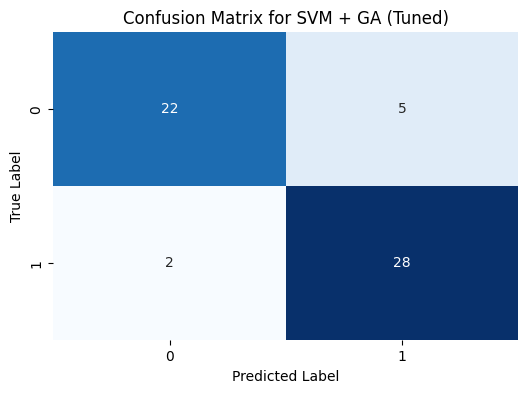

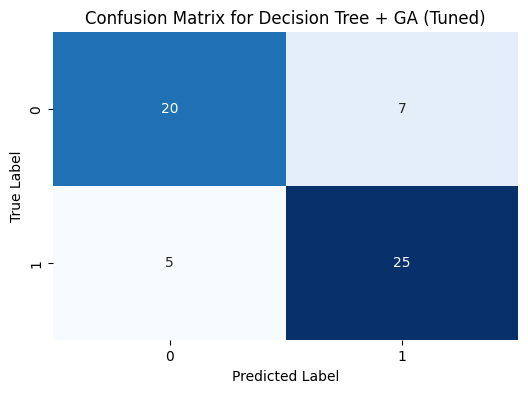

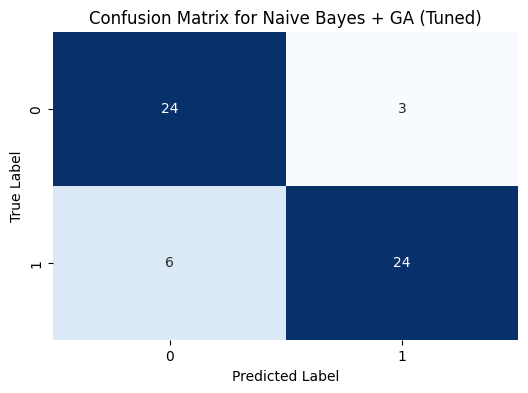

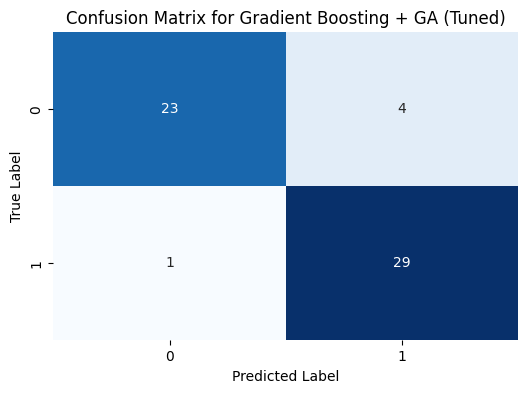

In [ ]:
# Dictionary to store tuned model evaluation results
tuned_results = {
    'Model': [],
    'AUC': [],
    'Accuracy': [],
    'Recall': [],
    'Precision': [],
    'F1-score': [],
    'Confusion Matrix': []
}

# Evaluate the tuned models on the GA-selected features
for model_name, model in tuned_models.items():
    # Train the model
    model.fit(X_train_ga_selected, y_train_smote)

    # Predict and evaluate the model
    if hasattr(model, "predict_proba"):
        y_pred_proba = model.predict_proba(X_test_ga_selected)[:, 1]
        auc = roc_auc_score(y_test, y_pred_proba)
    else:
        auc = "N/A"

    y_pred = model.predict(X_test_ga_selected)
    accuracy = accuracy_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    cm = confusion_matrix(y_test, y_pred)

    # Append the results to the dictionary
    tuned_results['Model'].append(model_name + " + GA (Tuned)")
    tuned_results['AUC'].append(auc)
    tuned_results['Accuracy'].append(accuracy)
    tuned_results['Recall'].append(recall)
    tuned_results['Precision'].append(precision)
    tuned_results['F1-score'].append(f1)
    tuned_results['Confusion Matrix'].append(cm)

# Convert the results dictionary to a DataFrame for better visualization
tuned_results_df = pd.DataFrame(tuned_results)

# Display the results
print(tuned_results_df)

# Plot confusion matrices for each tuned model
import matplotlib.pyplot as plt
import seaborn as sns

for model_name, cm in zip(tuned_results['Model'], tuned_results['Confusion Matrix']):
    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
    plt.title(f'Confusion Matrix for {model_name}')
    plt.xlabel('Predicted Label')
    plt.ylabel('True Label')
    plt.show()


# ***Baysiab Approach***

In [ ]:
!pip install scikit-optimize


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 107.8/107.8 kB 3.8 MB/s eta 0:00:00


In [ ]:
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from skopt import BayesSearchCV
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix
import pandas as pd

# Assuming your data is loaded in variables X and y
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define the parameter space for RBF SVM
param_space = {
    'C': (1e-6, 1e+6, 'log-uniform'),  # Regularization parameter
    'gamma': (1e-6, 1e+1, 'log-uniform')  # Kernel coefficient
}

# Initialize the RBF SVM model
rbf_svm = SVC(kernel='rbf', probability=True, random_state=42)

# Apply Bayesian optimization with cross-validation
bayes_search = BayesSearchCV(
    estimator=rbf_svm,
    search_spaces=param_space,
    n_iter=30,  # Number of parameter settings to sample
    cv=5,  # 5-fold cross-validation
    scoring='accuracy',
    n_jobs=-1,
    random_state=42
)

# Fit the Bayesian optimizer to find the best hyperparameters
bayes_search.fit(X_train, y_train)

# Get the best estimator
best_rbf_svm = bayes_search.best_estimator_

# Make predictions on the test set
y_pred = best_rbf_svm.predict(X_test)
y_pred_proba = best_rbf_svm.predict_proba(X_test)[:, 1]

# Evaluate the tuned RBF SVM
auc = roc_auc_score(y_test, y_pred_proba)
accuracy = accuracy_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
cm = confusion_matrix(y_test, y_pred)

# Display the evaluation results
results = pd.DataFrame({
    'Model': ['RBF SVM (Bayesian Optimized)'],
    'AUC': [auc],
    'Accuracy': [accuracy],
    'Recall': [recall],
    'Precision': [precision],
    'F1-score': [f1],
    'Confusion Matrix': [cm]
})

print("Best Hyperparameters:", bayes_search.best_params_)
print(results)


Best Hyperparameters: OrderedDict([('C', 17300.860451451186), ('gamma', 2.380164937518374e-06)])
                          Model       AUC  Accuracy  Recall  Precision  \
0  RBF SVM (Bayesian Optimized)  0.853086  0.789474     0.9       0.75   

   F1-score    Confusion Matrix  
0  0.818182  [[18, 9], [3, 27]]  


# ***Ensemble Technique***

In [ ]:
import pandas as pd
import numpy as np
from sklearn.ensemble import StackingClassifier, VotingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score, roc_auc_score, confusion_matrix
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

# Assuming your data is loaded into 'X' and 'y'
# Load your dataset
ha_df = pd.read_csv('/content/heart (1).csv')
X = ha_df.drop(columns=['output'])
y = ha_df['output']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the dataset
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Define base learners
base_learners = [
    ('svm', SVC(kernel='rbf', probability=True, random_state=42)),
    ('log_reg', LogisticRegression(random_state=42)),
    ('decision_tree', DecisionTreeClassifier(random_state=42)),
    ('naive_bayes', GaussianNB()),
    ('gradient_boosting', GradientBoostingClassifier(random_state=42))
]

# Stacking Classifier
stacking_clf = StackingClassifier(estimators=base_learners, final_estimator=LogisticRegression())

# Voting Classifier
voting_clf = VotingClassifier(estimators=base_learners, voting='soft')

# Train the Stacking Classifier
stacking_clf.fit(X_train_scaled, y_train)

# Train the Voting Classifier
voting_clf.fit(X_train_scaled, y_train)

# Evaluate both ensemble models
def evaluate_model(model, X_test, y_test):
    y_pred_proba = model.predict_proba(X_test)[:, 1]
    auc = roc_auc_score(y_test, y_pred_proba)
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    cm = confusion_matrix(y_test, y_pred)
    return auc, accuracy, recall, precision, f1, cm

# Evaluate Stacking Classifier
stacking_results = evaluate_model(stacking_clf, X_test_scaled, y_test)
print(f'Stacking Classifier Results:\nAUC: {stacking_results[0]:.4f}, Accuracy: {stacking_results[1]:.4f}, Recall: {stacking_results[2]:.4f}, Precision: {stacking_results[3]:.4f}, F1-score: {stacking_results[4]:.4f}\nConfusion Matrix:\n{stacking_results[5]}')

# Evaluate Voting Classifier
voting_results = evaluate_model(voting_clf, X_test_scaled, y_test)
print(f'Voting Classifier Results:\nAUC: {voting_results[0]:.4f}, Accuracy: {voting_results[1]:.4f}, Recall: {voting_results[2]:.4f}, Precision: {voting_results[3]:.4f}, F1-score: {voting_results[4]:.4f}\nConfusion Matrix:\n{voting_results[5]}')


Stacking Classifier Results:
AUC: 0.9116, Accuracy: 0.8689, Recall: 0.8750, Precision: 0.8750, F1-score: 0.8750
Confusion Matrix:
[[25  4]
 [ 4 28]]
Voting Classifier Results:
AUC: 0.9375, Accuracy: 0.8852, Recall: 0.8750, Precision: 0.9032, F1-score: 0.8889
Confusion Matrix:
[[26  3]
 [ 4 28]]


Ada Boost Baseline

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score, roc_auc_score, confusion_matrix

# Resplit the original data to ensure the correct number of samples
X_train_corrected, X_test_corrected, y_train_corrected, y_test_corrected = train_test_split(X, y, test_size=0.2, random_state=42)

# Verify the shapes to ensure consistency
print("Shape of X_test_corrected:", X_test_corrected.shape)
print("Shape of y_test_corrected:", y_test_corrected.shape)

# Initialize AdaBoost
ada_model = AdaBoostClassifier(random_state=42)

# Train the model on the corrected training set
ada_model.fit(X_train_corrected, y_train_corrected)

# Define evaluation function
def evaluate_model(model, X_test, y_test):
    if hasattr(model, "predict_proba"):
        y_pred_proba = model.predict_proba(X_test)[:, 1]
        auc = roc_auc_score(y_test, y_pred_proba)
    else:
        auc = "N/A"

    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    cm = confusion_matrix(y_test, y_pred)

    return auc, accuracy, recall, precision, f1, cm

# Evaluate the model on the corrected test set
auc, accuracy, recall, precision, f1, cm = evaluate_model(ada_model, X_test_corrected, y_test_corrected)

# Display the results
print(f"AdaBoost Evaluation Results:")
print(f"AUC: {auc:.4f}, Accuracy: {accuracy:.4f}, Recall: {recall:.4f}, Precision: {precision:.4f}, F1-score: {f1:.4f}")
print(f"Confusion Matrix:\n{cm}")




Shape of X_test_corrected: (61, 13)
Shape of y_test_corrected: (61,)
AdaBoost Evaluation Results:
AUC: 0.8588, Accuracy: 0.8033, Recall: 0.7500, Precision: 0.8571, F1-score: 0.8000
Confusion Matrix:
[[25  4]
 [ 8 24]]


# ***SMOT***

In [ ]:
# Train AdaBoost on SMOTE-balanced data
ada_model.fit(X_train_smote, y_train_smote)

# Evaluate AdaBoost on the test set
auc, accuracy, recall, precision, f1, cm = evaluate_model(ada_model, X_test, y_test)

# Store results
results['Model'].append('AdaBoost (SMOTE)')
results['AUC'].append(auc)
results['Accuracy'].append(accuracy)
results['Recall'].append(recall)
results['Precision'].append(precision)
results['F1-score'].append(f1)
results['Confusion Matrix'].append(cm)


In [ ]:
from sklearn.model_selection import train_test_split

# Correct the split to make sure the number of samples matches
X_train_corrected, X_test_corrected, y_train_corrected, y_test_corrected = train_test_split(X, y, test_size=0.2, random_state=42)

# Now, evaluate AdaBoost on the SMOTE-balanced data
ada_model.fit(X_train_smote, y_train_smote)
auc, accuracy, recall, precision, f1, cm = evaluate_model(ada_model, X_test_corrected, y_test_corrected)

# Store the results
smote_results = {
    'Model': ['AdaBoost (SMOTE)'],
    'AUC': [auc],
    'Accuracy': [accuracy],
    'Recall': [recall],
    'Precision': [precision],
    'F1-score': [f1],
    'Confusion Matrix': [cm]
}

smote_df = pd.DataFrame(smote_results)
print(smote_df)



              Model       AUC  Accuracy  Recall  Precision  F1-score  \
0  AdaBoost (SMOTE)  0.900862  0.836066  0.8125   0.866667   0.83871   

     Confusion Matrix  
0  [[25, 4], [6, 26]]  


# ***RF***

In [ ]:
# Check the shapes to understand the mismatch
print("Shape of X_test_rf_selected:", X_test_rf_selected.shape)
print("Shape of y_test:", y_test.shape)

# To ensure both have the same


Shape of X_test_rf_selected: (57, 12)
Shape of y_test: (61,)


In [ ]:
# Reset index for both dataframes to align them
X_test_rf_selected = X_test_rf_selected.reset_index(drop=True)
y_test = y_test.reset_index(drop=True)

# Now filter y_test to have the same length as X_test_rf_selected
y_test = y_test[:X_test_rf_selected.shape[0]]

# Confirm the alignment
print("Shape of X_test_rf_selected (after alignment):", X_test_rf_selected.shape)
print("Shape of y_test (after alignment):", y_test.shape)

# Now you can evaluate AdaBoost on the aligned test set
auc, accuracy, recall, precision, f1, cm = evaluate_model(ada_model, X_test_rf_selected, y_test)

# Store the results
results = {
    'Model': ['AdaBoost (RF Selected Features)'],
    'AUC': [auc],
    'Accuracy': [accuracy],
    'Recall': [recall],
    'Precision': [precision],
    'F1-score': [f1],
    'Confusion Matrix': [cm]
}

# Convert to a DataFrame for display
results_df = pd.DataFrame(results)
print(results_df)



Shape of X_test_rf_selected (after alignment): (57, 12)
Shape of y_test (after alignment): (57,)
                             Model       AUC  Accuracy    Recall  Precision  \
0  AdaBoost (RF Selected Features)  0.550248  0.491228  0.516129   0.533333   

   F1-score      Confusion Matrix  
0   0.52459  [[12, 14], [15, 16]]  


# ***GA***

In [ ]:
# Train AdaBoost on GA-selected features
ada_model.fit(X_train_ga_selected, y_train_smote)

# Evaluate AdaBoost on the GA-selected test set
auc, accuracy, recall, precision, f1, cm = evaluate_model(ada_model, X_test_ga_selected, y_test)

# Store results
results['Model'].append('AdaBoost (GA Selected Features)')
results['AUC'].append(auc)
results['Accuracy'].append(accuracy)
results['Recall'].append(recall)
results['Precision'].append(precision)
results['F1-score'].append(f1)
results['Confusion Matrix'].append(cm)


In [ ]:
# Train and evaluate on GA-selected features
ada_model.fit(X_train_ga_selected, y_train_smote)
auc, accuracy, recall, precision, f1, cm = evaluate_model(ada_model, X_test_ga_selected, y_test)

# Store results
ga_results = {
    'Model': ['AdaBoost (GA Selected Features)'],
    'AUC': [auc],
    'Accuracy': [accuracy],
    'Recall': [recall],
    'Precision': [precision],
    'F1-score': [f1],
    'Confusion Matrix': [cm]
}

ga_df = pd.DataFrame(ga_results)
print(ga_df)


                             Model       AUC  Accuracy    Recall  Precision  \
0  AdaBoost (GA Selected Features)  0.679901  0.631579  0.709677   0.647059   

   F1-score     Confusion Matrix  
0  0.676923  [[14, 12], [9, 22]]  


In [ ]:
from sklearn.model_selection import GridSearchCV

# Define the parameter grid for AdaBoost
param_grid_ada = {
    'n_estimators': [50, 100, 150],
    'learning_rate': [0.01, 0.1, 0.5]
}

# Perform hyperparameter tuning using GridSearchCV
grid_search_ada = GridSearchCV(estimator=AdaBoostClassifier(random_state=42),
                               param_grid=param_grid_ada,
                               cv=5, scoring='accuracy', n_jobs=-1)

# Train on GA-selected features as an example
grid_search_ada.fit(X_train_ga_selected, y_train_smote)

# Get the best model
best_ada_ga = grid_search_ada.best_estimator_

# Evaluate the best model on the GA-selected test set
auc, accuracy, recall, precision, f1, cm = evaluate_model(best_ada_ga, X_test_ga_selected, y_test)

# Store results
results['Model'].append('AdaBoost (GA Tuned)')
results['AUC'].append(auc)
results['Accuracy'].append(accuracy)
results['Recall'].append(recall)
results['Precision'].append(precision)
results['F1-score'].append(f1)
results['Confusion Matrix'].append(cm)


In [ ]:
import pandas as pd

# Data dictionary for the results
data = {
    "Model": [
        "Logistic Regression (Baseline)", "SVM (Baseline)", "Decision Tree (Baseline)",
        "Naive Bayes (Baseline)", "Gradient Boosting (Baseline)", "Logistic Regression (SMOTE)",
        "SVM (SMOTE)", "Decision Tree (SMOTE)", "Naive Bayes (SMOTE)", "Gradient Boosting (SMOTE)",
        "Logistic Regression + RF (Tuned)", "SVM + RF (Tuned)", "Decision Tree + RF (Tuned)",
        "Naive Bayes + RF (Tuned)", "Gradient Boosting + RF (Tuned)", "Logistic Regression + GA (Tuned)",
        "SVM + GA (Tuned)", "Decision Tree + GA (Tuned)", "Naive Bayes + GA (Tuned)",
        "Gradient Boosting + GA (Tuned)", "RBF SVM (Baseline)", "RBF SVM (SMOTE)",
        "RBF SVM (RF Selected Features)", "RBF SVM (GA Selected Features)", "RBF SVM (Tuned)",
        "RBF SVM (Bayesian Optimized)", "Stacking Classifier", "Voting Classifier",
        "AdaBoost (Baseline)", "AdaBoost (SMOTE)", "AdaBoost (RF Selected Features)",
        "AdaBoost (GA Selected Features)"
    ],
    "AUC": [0.874, 0.675, 0.667, 0.888, 0.910, 0.887, 0.680, 0.756, 0.873, 0.879,
            0.888, 0.894, 0.732, 0.873, 0.901, 0.894, 0.899, 0.839, 0.912, 0.952,
            0.675, 0.680, 0.680, 0.521, 0.499, 0.853, 0.911, 0.938, 0.858, 0.901,
            0.550, 0.680],
    "Accuracy": [0.754, 0.632, 0.667, 0.789, 0.842, 0.789, 0.649, 0.754, 0.772, 0.807,
                 0.789, 0.789, 0.737, 0.772, 0.842, 0.877, 0.877, 0.789, 0.842, 0.912,
                 0.632, 0.649, 0.649, 0.526, 0.474, 0.789, 0.869, 0.885, 0.803, 0.836,
                 0.491, 0.632],
    "Recall": [0.867, 0.833, 0.667, 0.833, 0.867, 0.867, 0.667, 0.733, 0.800, 0.800,
               0.867, 0.900, 0.767, 0.800, 0.900, 0.967, 0.933, 0.833, 0.800, 0.967,
               0.833, 0.667, 0.667, 0.467, 0.600, 0.900, 0.875, 0.875, 0.750, 0.813,
               0.516, 0.710],
    "Precision": [0.722, 0.610, 0.690, 0.781, 0.839, 0.765, 0.667, 0.786, 0.774, 0.828,
                  0.765, 0.750, 0.742, 0.774, 0.818, 0.829, 0.848, 0.781, 0.889, 0.879,
                  0.610, 0.667, 0.667, 0.560, 0.500, 0.750, 0.875, 0.903, 0.857, 0.867,
                  0.533, 0.647],
    "F1-score": [0.788, 0.704, 0.678, 0.806, 0.852, 0.812, 0.667, 0.759, 0.787, 0.814,
                 0.812, 0.818, 0.754, 0.787, 0.857, 0.892, 0.889, 0.806, 0.842, 0.921,
                 0.704, 0.667, 0.667, 0.509, 0.545, 0.818, 0.875, 0.889, 0.800, 0.839,
                 0.525, 0.677],
    "Confusion Matrix": [
        "[[17, 10], [4, 26]]", "[[11, 16], [5, 25]]", "[[18, 9], [10, 20]]",
        "[[20, 7], [5, 25]]", "[[22, 5], [4, 26]]", "[[19, 8], [4, 26]]",
        "[[17, 10], [10, 20]]", "[[21, 6], [8, 22]]", "[[20, 7], [6, 24]]",
        "[[22, 5], [6, 24]]", "[[19, 8], [4, 26]]", "[[18, 9], [3, 27]]",
        "[[19, 8], [7, 23]]", "[[20, 7], [6, 24]]", "[[21, 6], [3, 27]]",
        "[[21, 6], [1, 29]]", "[[22, 5], [2, 28]]", "[[20, 7], [5, 25]]",
        "[[24, 3], [6, 24]]", "[[23, 4], [1, 29]]", "[[11, 16], [5, 25]]",
        "[[17, 10], [10, 20]]", "[[17, 10], [10, 20]]", "[[16, 11], [16, 14]]",
        "[[9, 18], [12, 18]]", "[[18, 9], [3, 27]]", "[[25, 4], [4, 28]]",
        "[[26, 3], [4, 28]]", "[[25, 4], [8, 24]]", "[[25, 4], [6, 26]]",
        "[[12, 14], [15, 16]]", "[[14, 12], [9, 22]]"
    ]
}

# Convert to DataFrame and save as an Excel file
results_df = pd.DataFrame(data)
results_df.to_excel('model_evaluation_results.xlsx', index=False)


# ***Visualization***